In [ ]:
딮러닝 

딮러닝이 나오게된 발상. 
뇌는 뉴런 이라는 수없이 많은 신경세포들의 연결을 갖고 있음. -> 인공신경망은 이러한 신경세포의 동작을 흉내내는 장치나 소프트
                                                             웨어를 만들어 뇌가 수행하는 인지나 사고능력을 갖춘 기계를 만드려는 노력
이러한 방식의 연구를 통해 인공지능을 구현하려는 방식을 "연결주의"


책 page  : 232

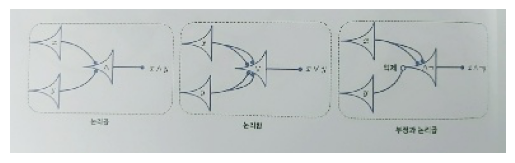

In [1]:
from PIL import Image
import matplotlib.pyplot as plt 
image_path = 'C:/Users/carlo/Desktop/AI_CWNU/neuron.jpg'  
image = Image.open(image_path) 
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
         논리곱               논리합                부정과 논리곱
    
이것으로 논리연산이 가능함. 

삼각형은 "신경세포"  

선 으로 된 끝에있는 지점을 "시냅스" -> 색깔 칠해진부분은 (1) 신호가 전달된것 

3번째사진에 흰색의 동그란건 "억제" -> 0 , 색있는건 - 1 : 연결된 신경세포가 활성화되지못하게 막는역할



In [ ]:
퍼셉트론이 분명 다양한 가능을 수행할 수 있지만 , 오류를 줄이고 원하는 기능을 학습할수있도록 하는
방법이 없다면 이 모델을 훈련 시킬 수 없다. 




#### 퍼셉트론 모델을 이용하여 참(1)과 거짓(-1) 의 값을 갖는 두입력에 대해 논리합을 수행할 수 있도록 모델을 학습시켜보라 

###### )힌트 퍼셉트론 모델은 입력 노드 둘을 담은 벡터 X 와 이 입력에 곱해질 가중치 벡터 W 를 준비하고 편향 b를 더해주면 된다. 출력은 W.dox(X)+b의 값을 활성화 함수에 넣어 구한다.

In [2]:
import numpy as np

W, b = np.array([0,0]),0
learning_rate = 0.01

In [3]:
def activation(s):
    if s > 0 : return 1 #신호가 0보다 크면 1을 내보내고 
    elif s < 0 : return -1 #0보다 작으면 -1
    return 0 #0이면 0

def out(x):
    return activation(W.dot(x) + b) #W.dox(x) == W[0] *x[0] + W[1]*x[1]

def train(x0, x1, target):#target = 정답
    global W,b 
    X = np.array([x0,x1]) #백터형태로 넘겨줘야함
    y = out(X)
    
    if target == y: return False #정답을 맞으면 현상태유지 . 
        
    else:
        print("가중치 수정전 target : {} y:{} ,b{}, w:{}".format(target,y,b,W))
        W = W + learning_rate * X * target  #입력 * 출력 비례하여 가중치 변경
        b = b + learning_rate * 1 * target  #편향 : 입력이 1이라고 볼수있음. 
        print("가중치 수정후 target : {} y:{} ,b{}, w:{}".format(target,y,b,W))
        return True
    
    
def predict(inputs):
    outputs = []
    for x in inputs : #입력상 여러개 받아서 for문돌려서 1쌍씩 꺼내와서 
        outputs.append(out(x)) #outputs 에 넣겠다
    return outputs 

In [4]:
adjusted = 0 
for i in range(100): 
    adjusted += train(-1,-1,-1) 
    adjusted += train(-1, 1 ,1)
    adjusted += train( 1,-1, 1)
    adjusted += train( 1, 1, 1)
    print("iteration -----------------", i) 
    if not adjusted : break 
    adjusted = 0 

가중치 수정전 target : -1 y:0 ,b0, w:[0 0]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]
가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]
iteration ----------------- 0
iteration ----------------- 1


In [5]:
X = [[-1,-1], [-1,1], [1,-1], [1,1]]
yhat = predict(X)
print("x0 x1 y")
for i in range(len(X)):
    print("{0:2d} {1:2d} {2:2d}".format(X[i][0],X[i][1],yhat[i]))
    

x0 x1 y
-1 -1 -1
-1  1  1
 1 -1  1
 1  1  1


In [6]:
from matplotlib.colors import ListedColormap

def predict_(inputs):
    outputs = []
    for x in inputs : 
        outputs.append(out(x)) 
    return np.array(outputs)


def plot_decision_regions_percept(X, y, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = predict_(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl) 
    plt.legend()
    plt.show()

In [10]:

def train_plot(x0, x1, target,X_plot , y_plot): 
    global W,b 
    X = np.array([x0,x1]) 
    y = out(X)
    
    plot_decision_regions_percept(X =X_plot,
                                  y =y_plot)
    if target == y: return False 
    else:
        print("가중치 수정전 target : {} y:{} ,b{}, w:{}".format(target,y,b,W))
        W = W + learning_rate * X * target   
        b = b + learning_rate * 1 * target 
        print("가중치 수정후 target : {} y:{} ,b{}, w:{}".format(target,y,b,W))
        return True
    

C:\Users\carlo\AppData\Local\Temp\ipykernel_30996\3054931198.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\carlo\AppData\Local\Temp\ipykernel_30996\3054931198.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


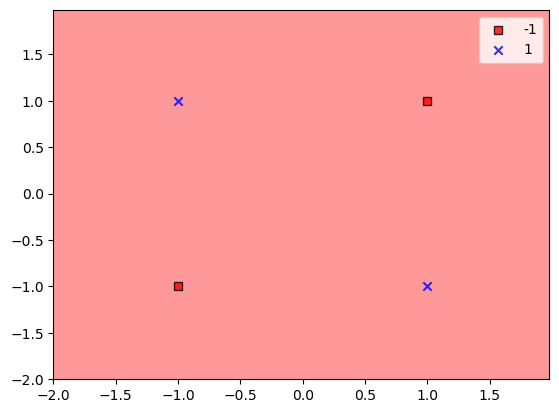

가중치 수정전 target : -1 y:0 ,b0, w:[0 0]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


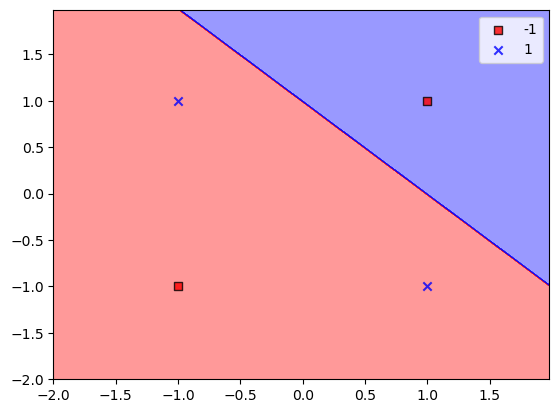

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


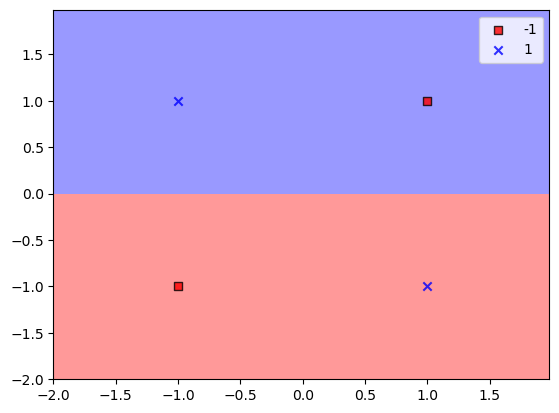

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


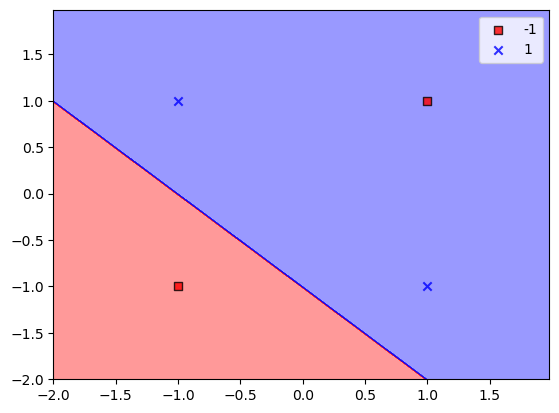

iteration ----------------- 0


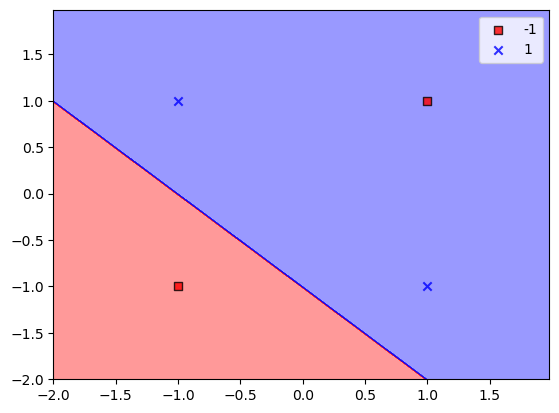

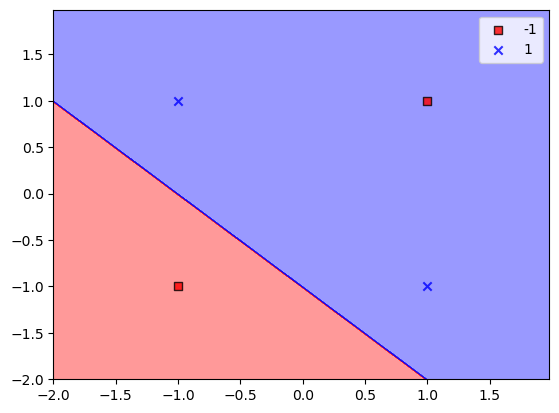

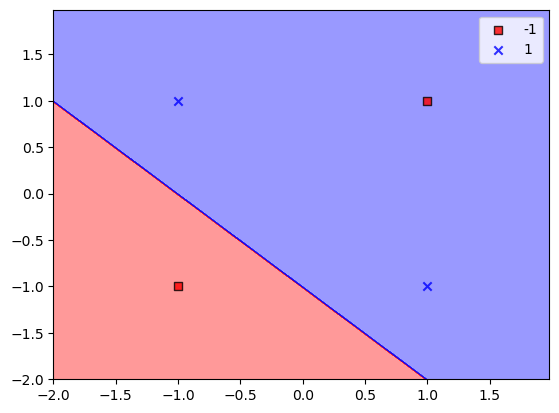

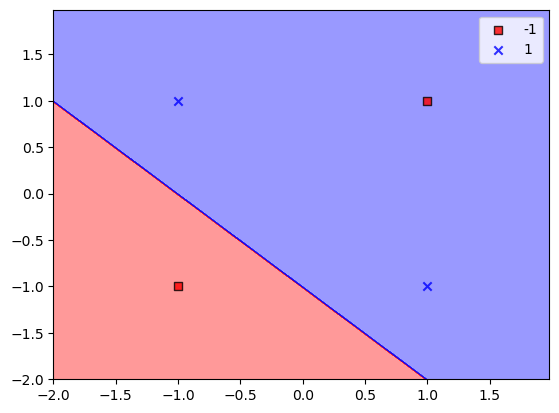

iteration ----------------- 1


In [8]:
#논리합 
W = np.array([0,0])
b = 0 
adjusted = 0 
for i in range(100): 
    adjusted += train_plot(-1,-1,-1) 
    adjusted += train_plot(-1, 1 ,1)
    adjusted += train_plot( 1,-1, 1)
    adjusted +=train_plot( 1, 1, 1)
    print("iteration -----------------", i) 
    if not adjusted : break 
    adjusted = 0 

C:\Users\carlo\AppData\Local\Temp\ipykernel_25344\3054931198.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\carlo\AppData\Local\Temp\ipykernel_25344\3054931198.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


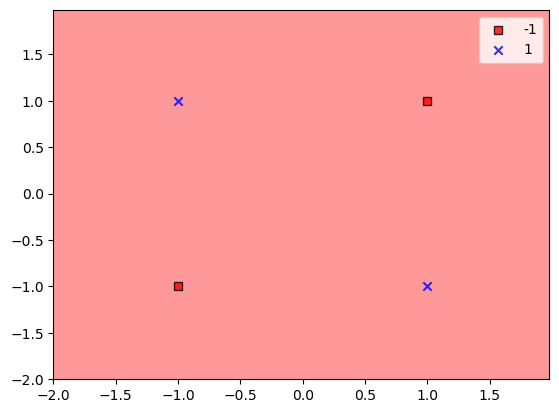

가중치 수정전 target : -1 y:0 ,b0, w:[0 0]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


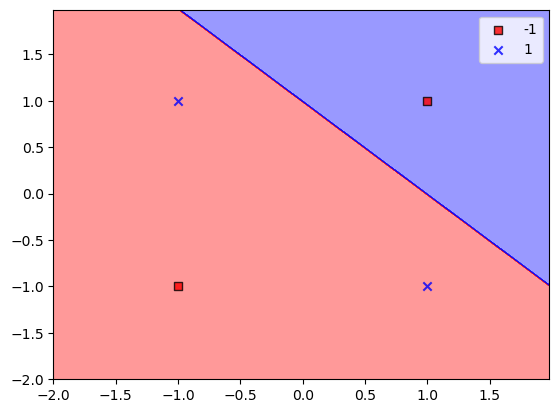

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


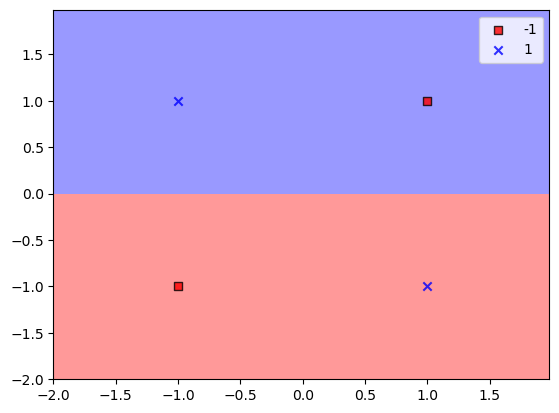

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


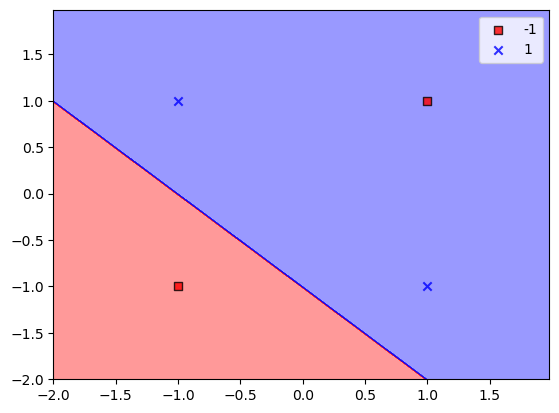

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 0


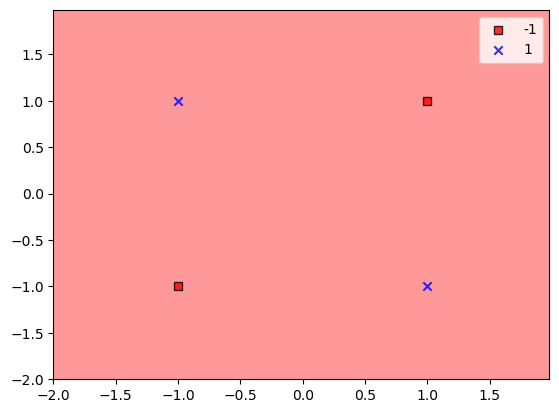

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


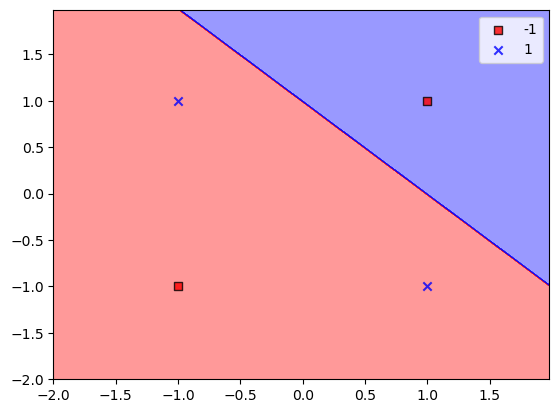

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


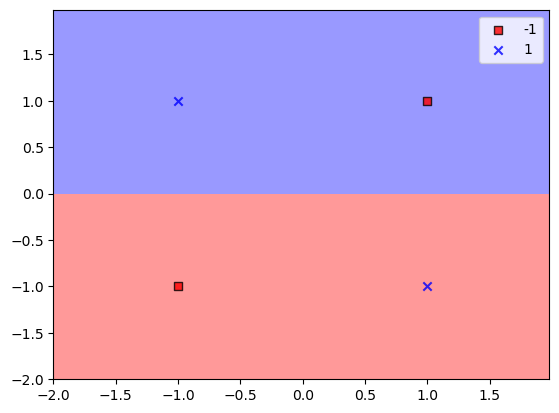

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


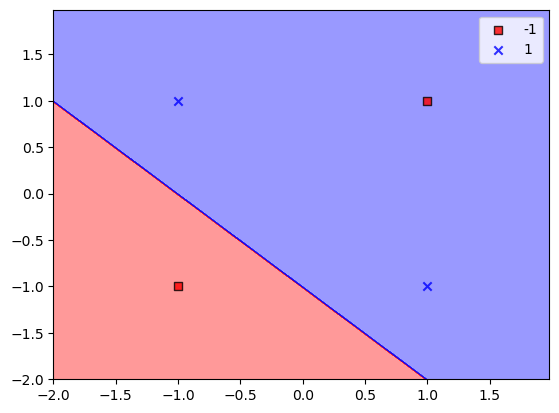

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 1


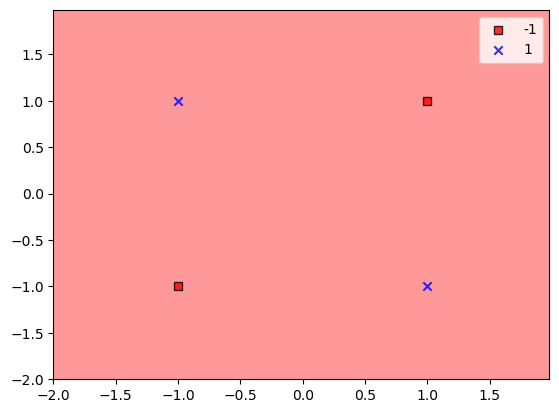

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


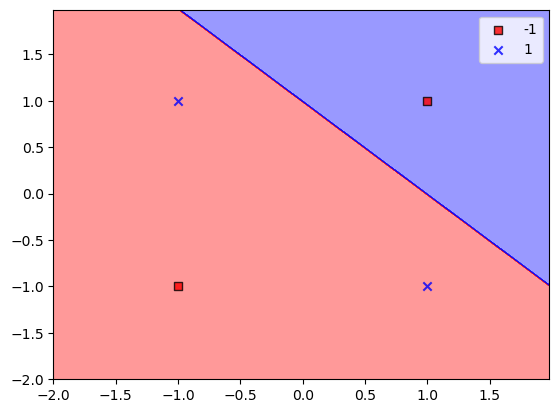

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


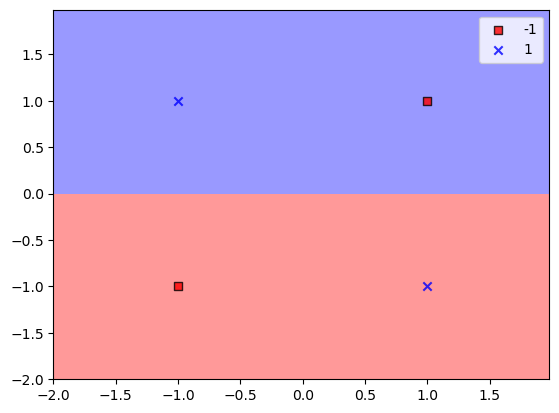

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


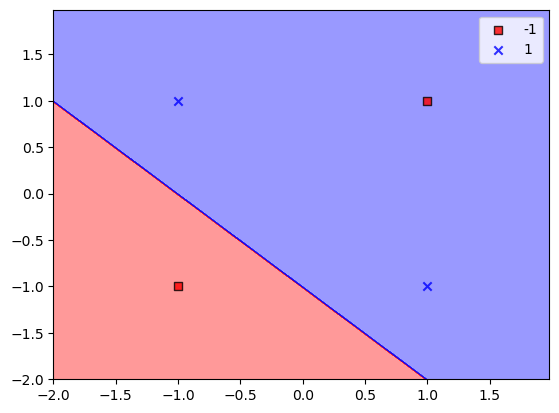

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 2


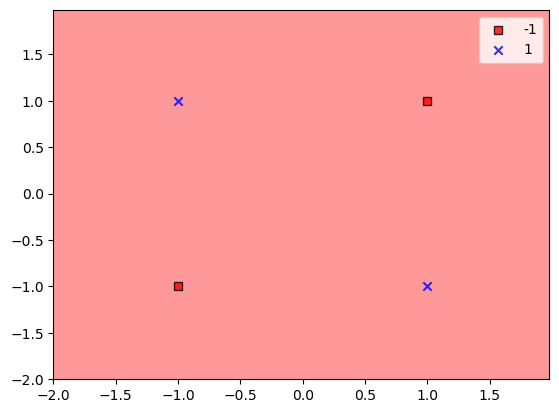

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


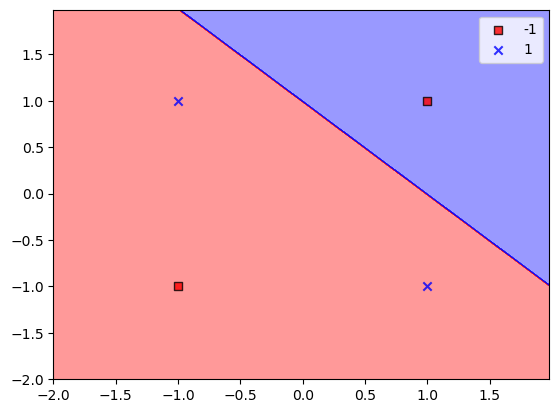

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


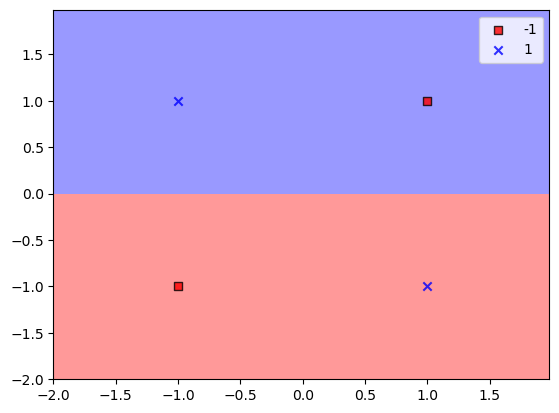

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


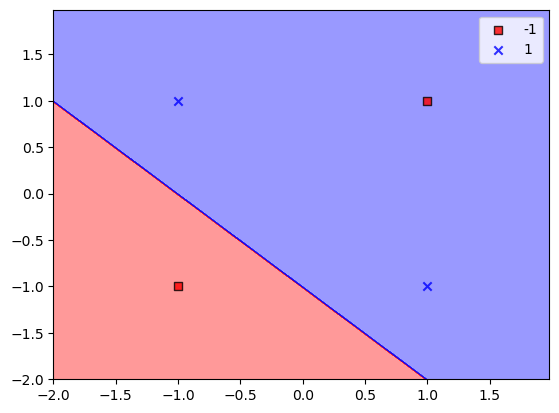

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 3


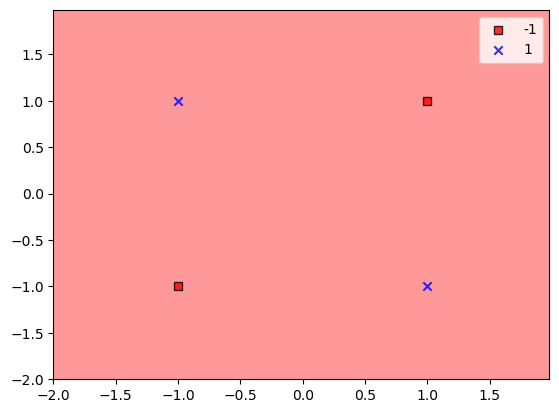

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


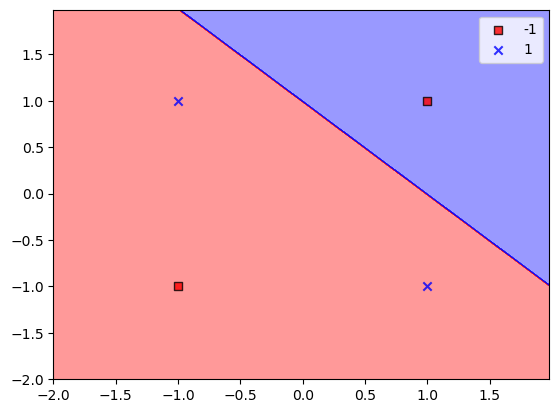

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


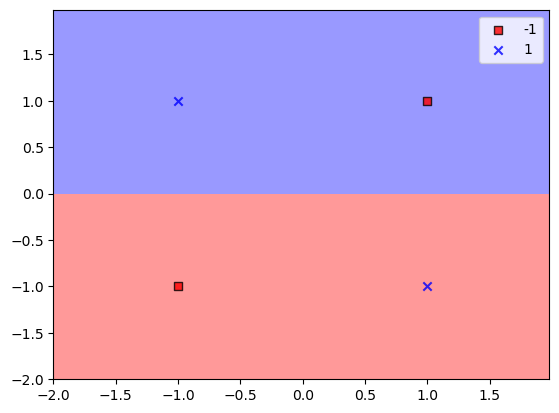

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


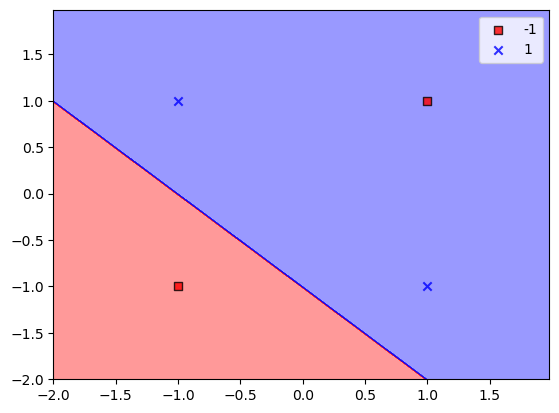

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 4


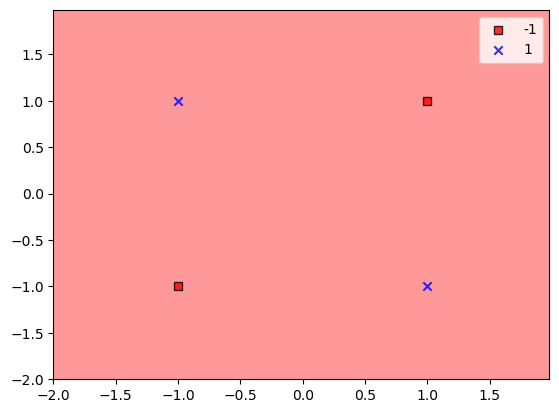

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


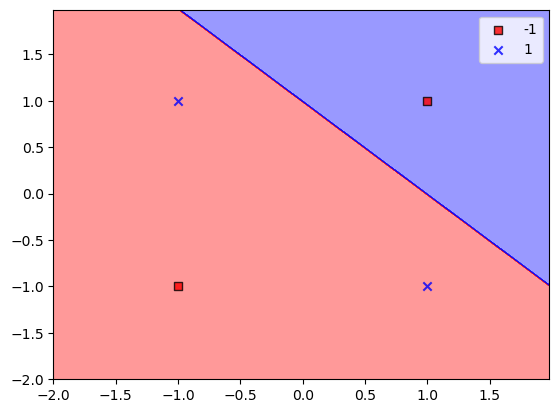

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


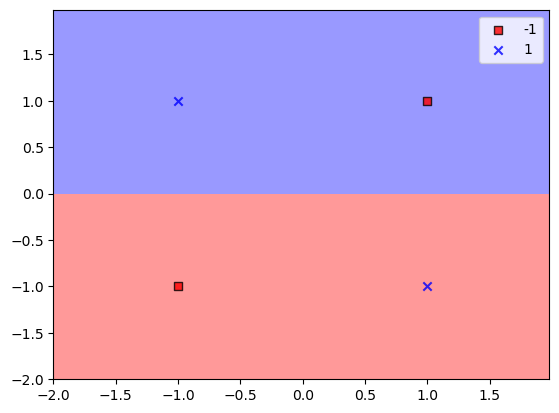

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


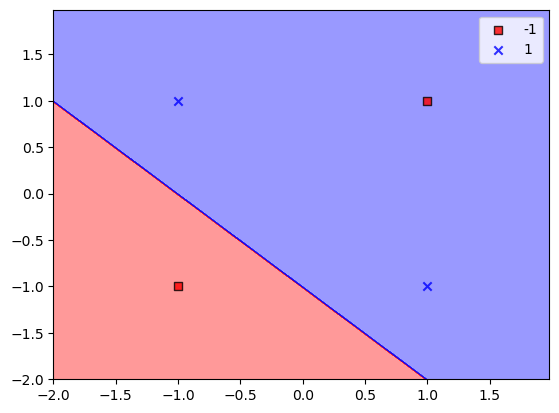

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 5


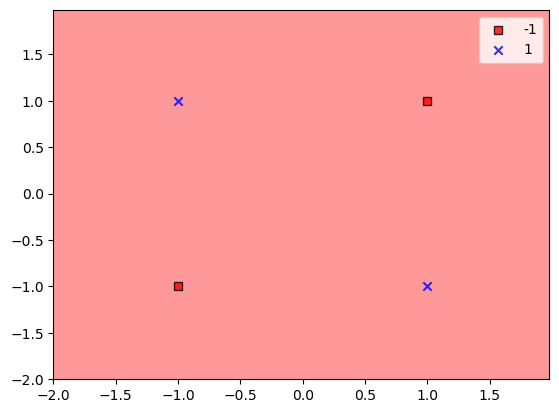

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


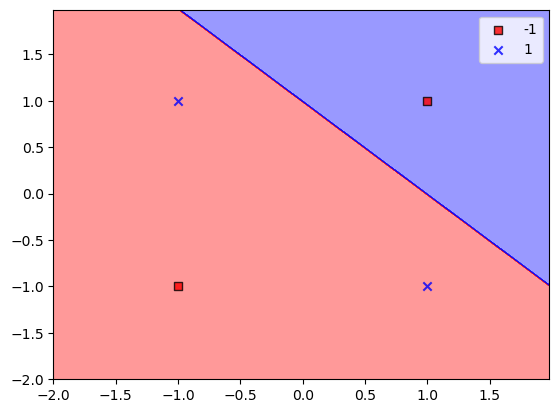

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


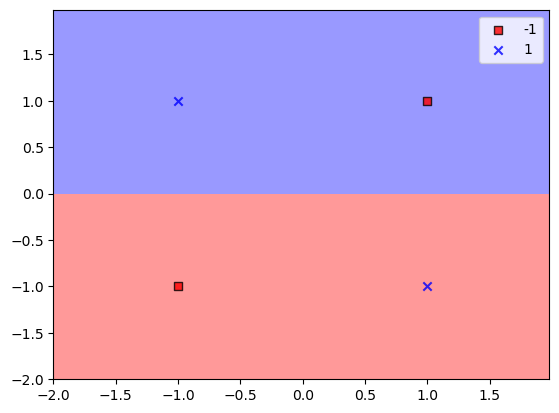

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


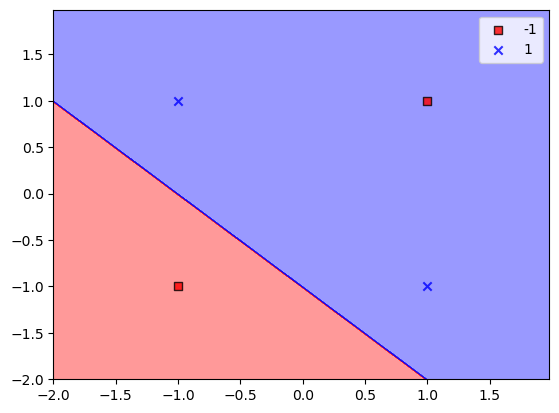

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 6


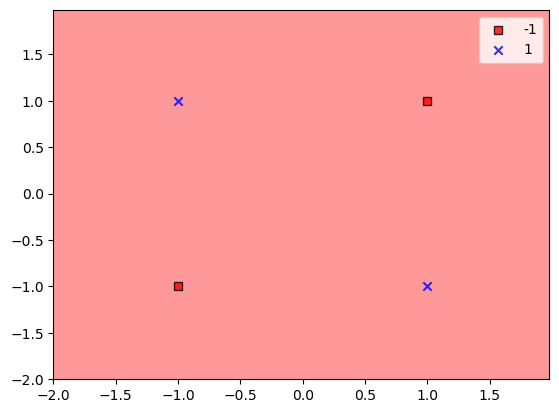

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


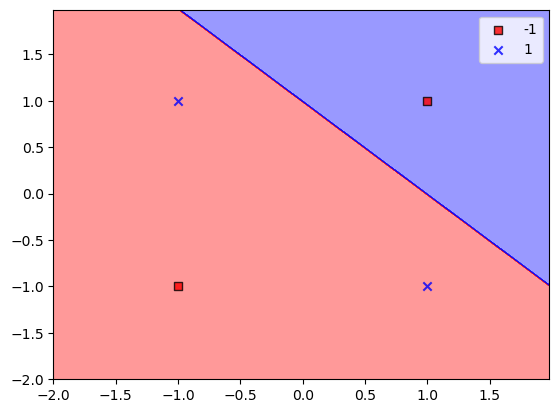

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


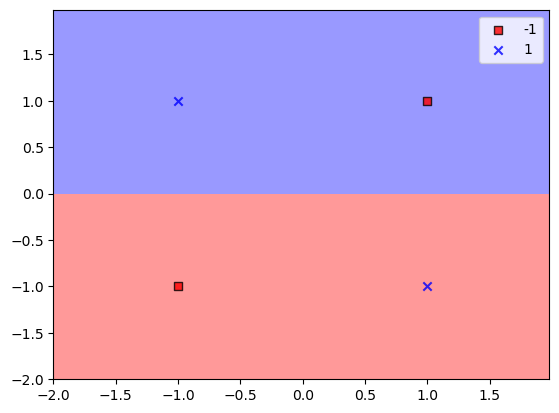

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


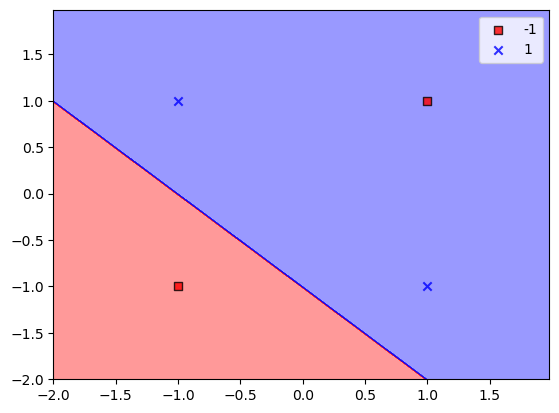

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 7


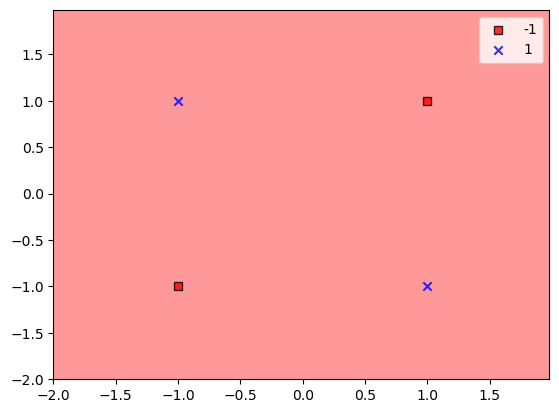

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


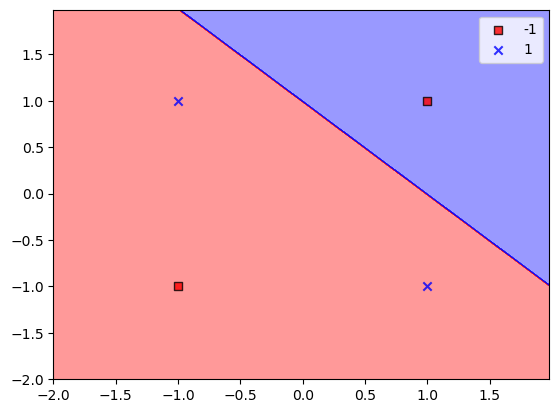

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


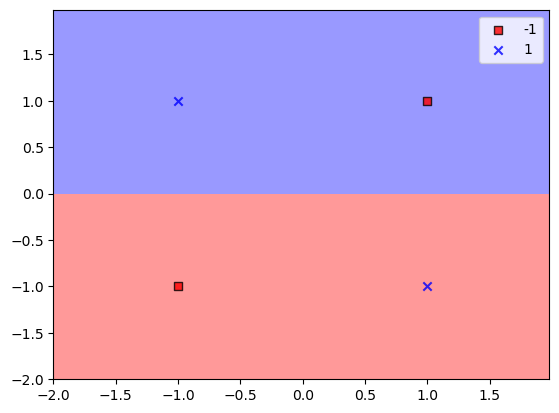

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


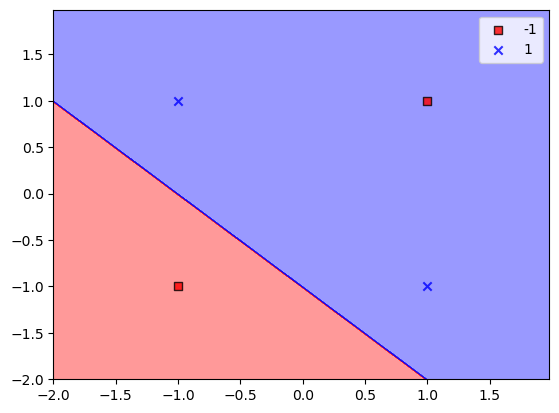

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 8


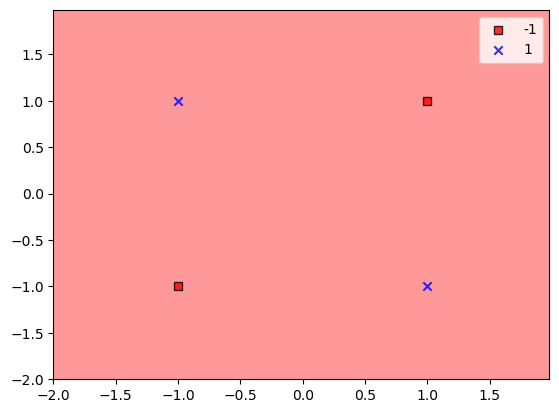

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


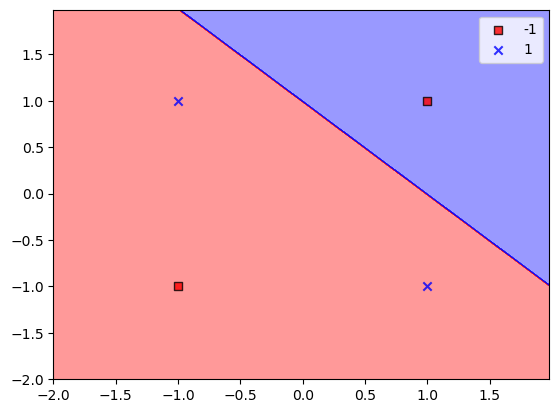

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


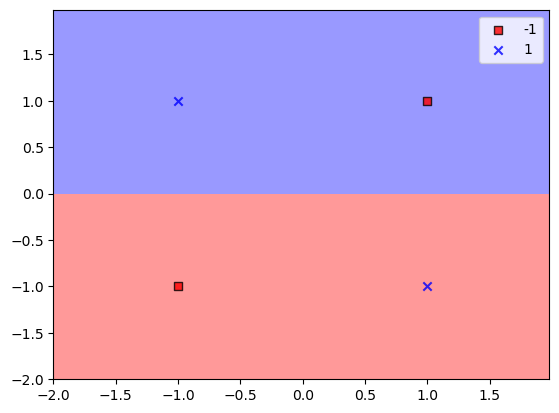

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


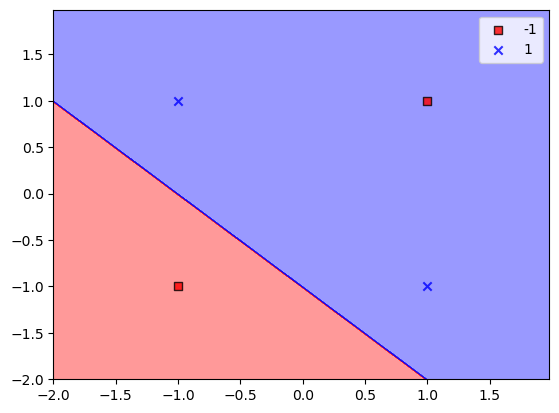

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 9


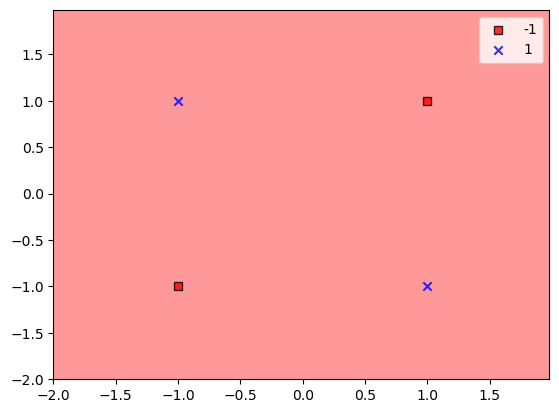

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


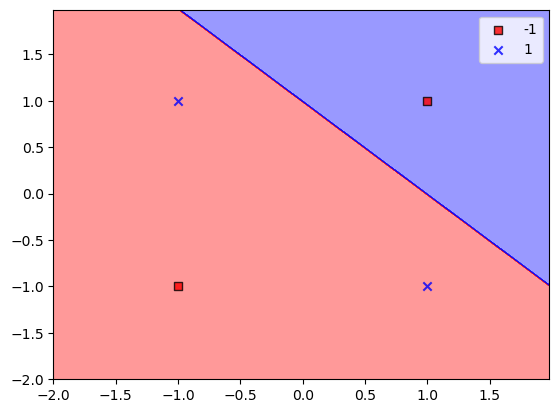

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


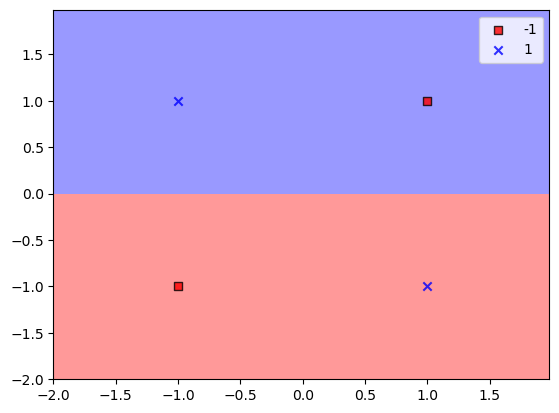

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


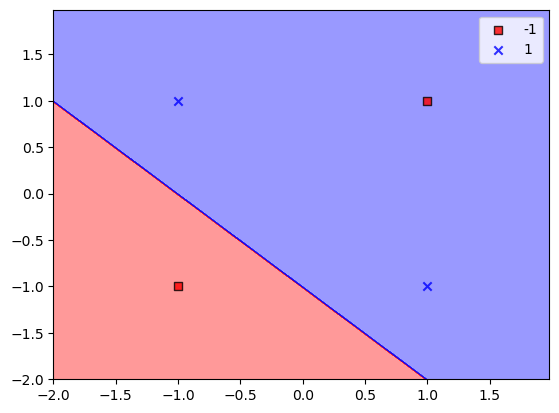

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 10


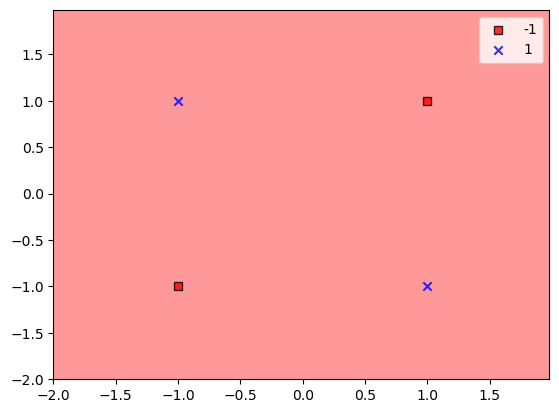

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


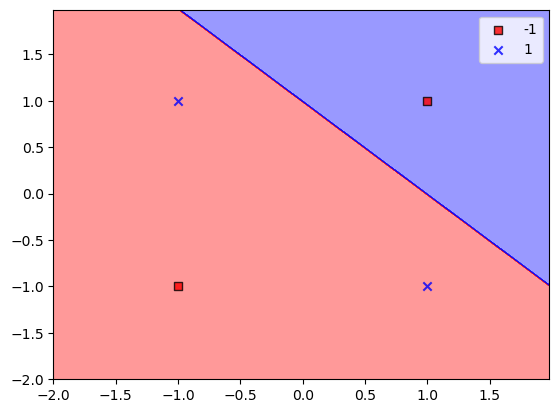

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


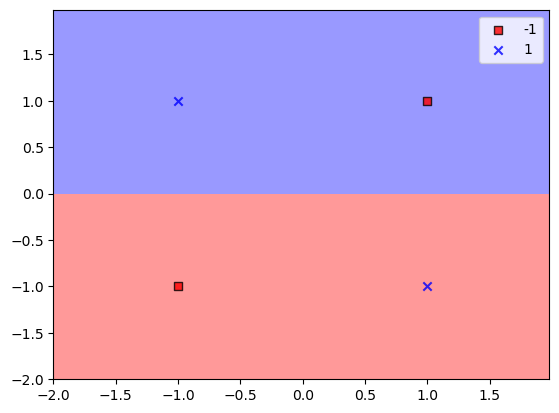

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


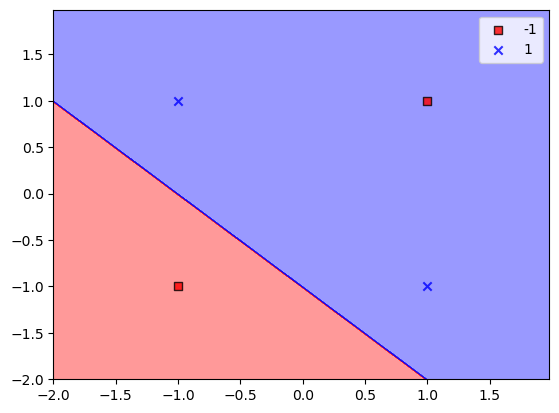

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 11


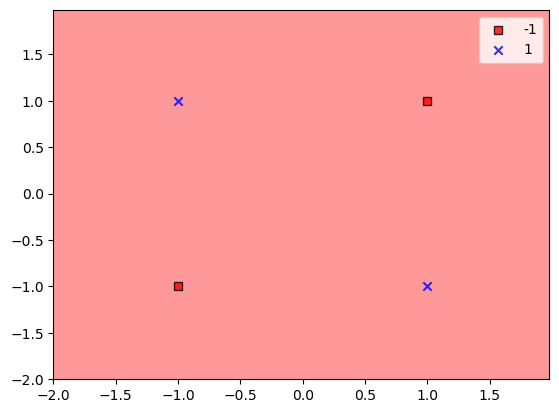

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


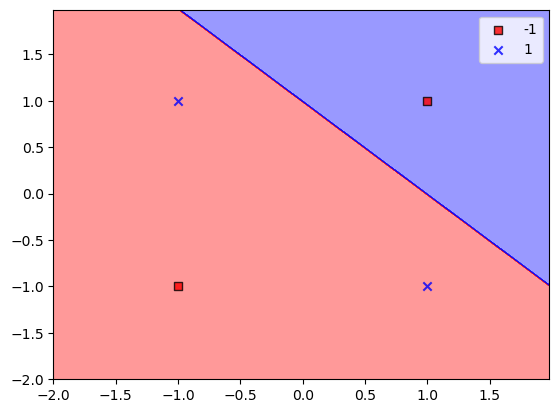

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


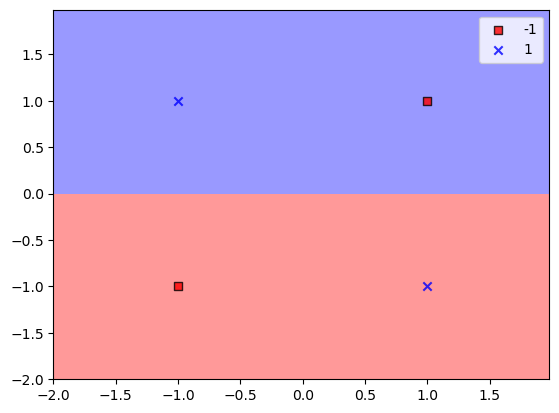

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


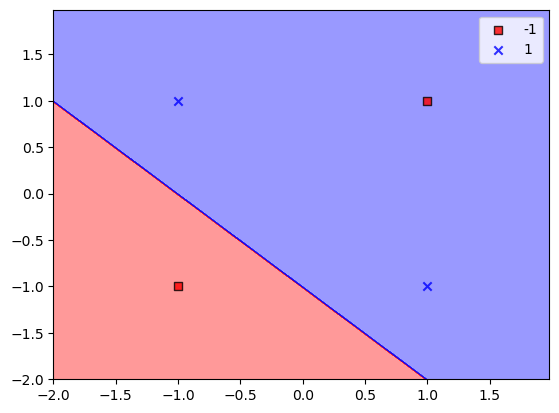

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 12


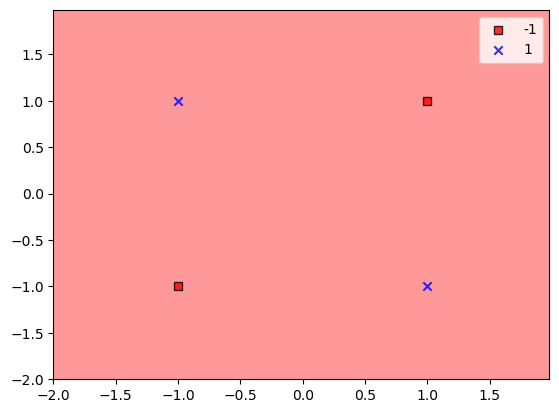

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


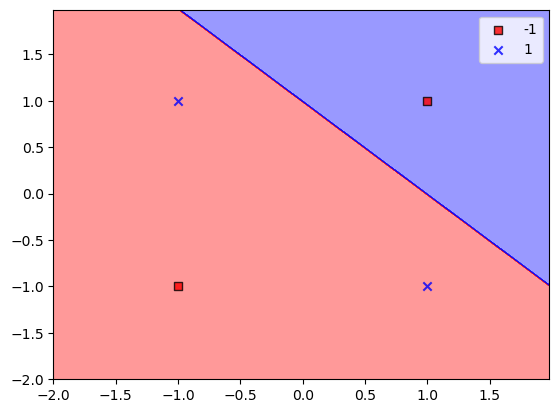

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


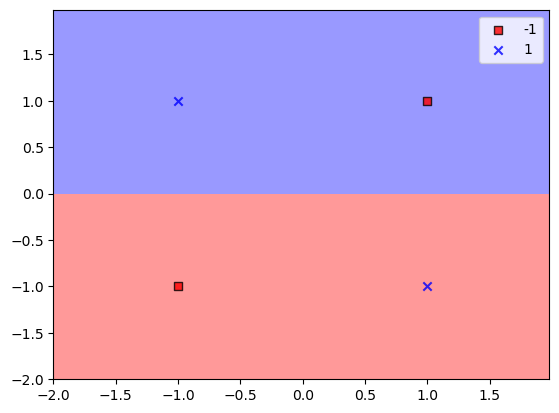

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


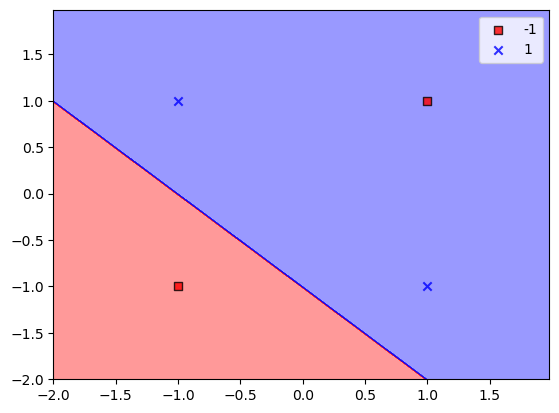

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 13


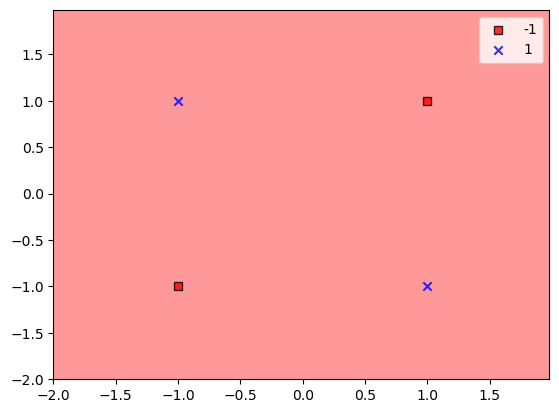

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


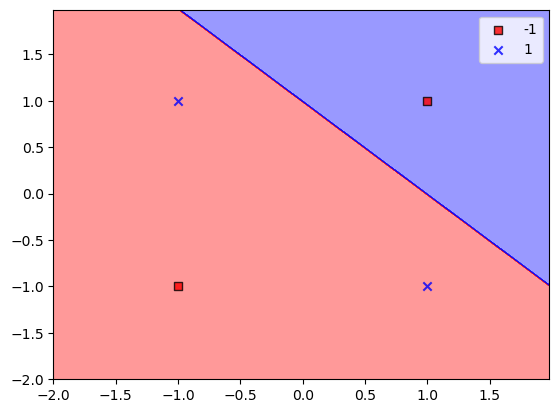

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


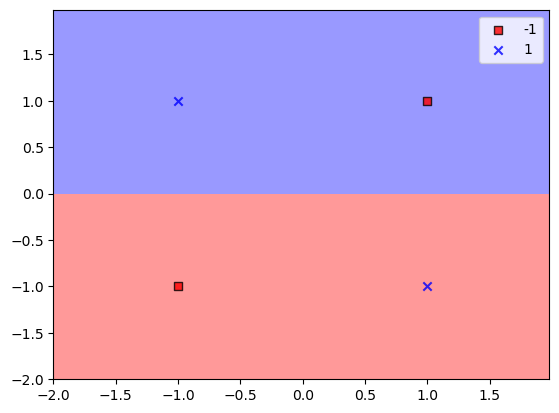

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


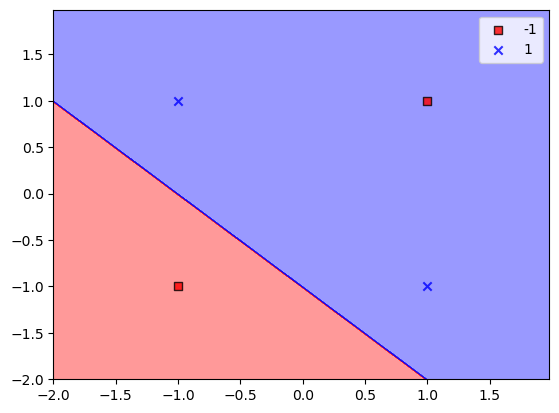

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 14


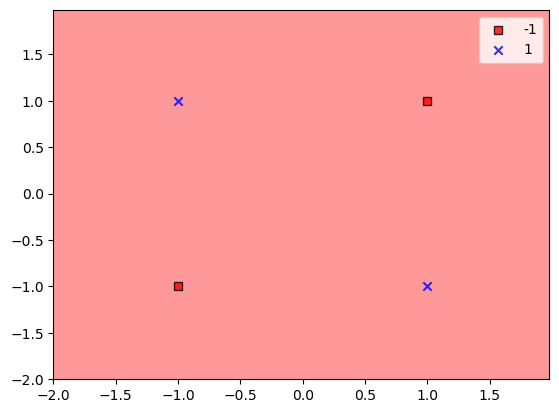

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


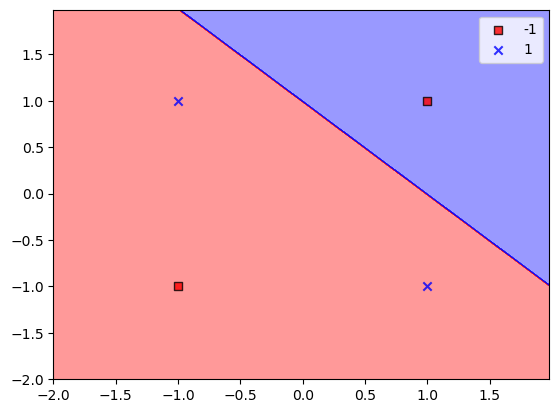

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


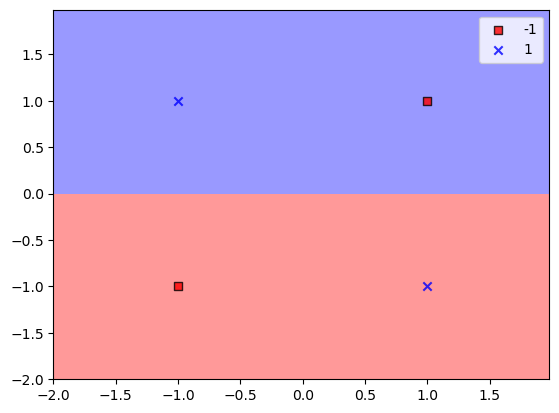

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


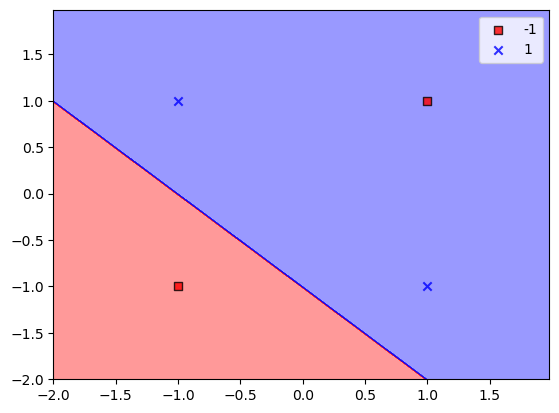

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 15


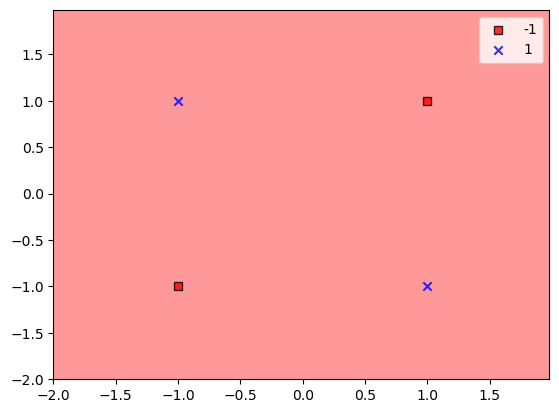

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


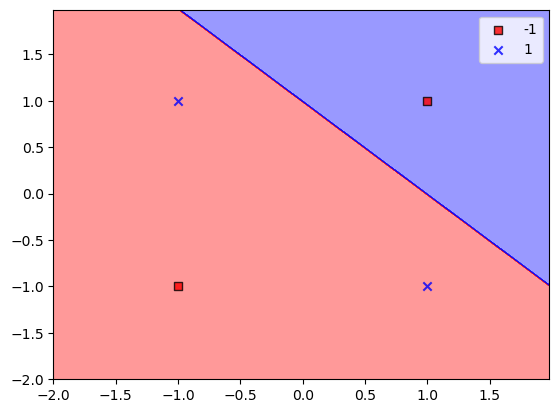

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


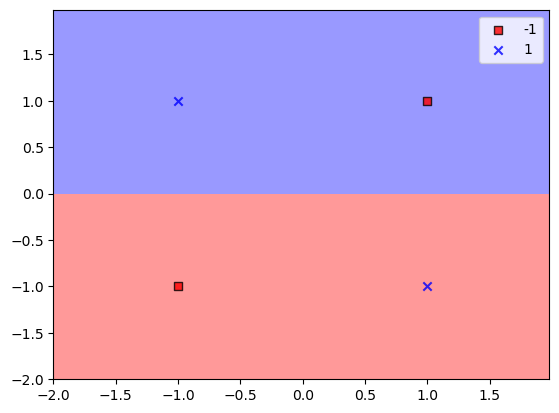

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


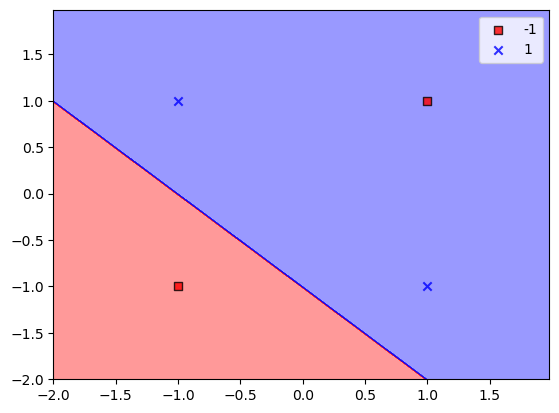

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 16


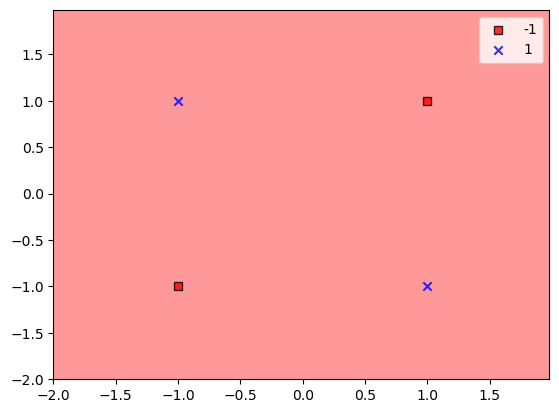

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


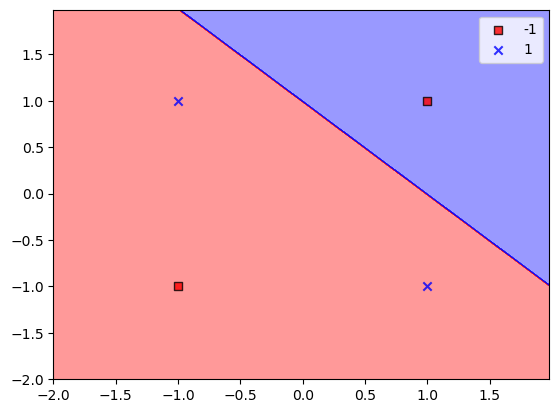

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


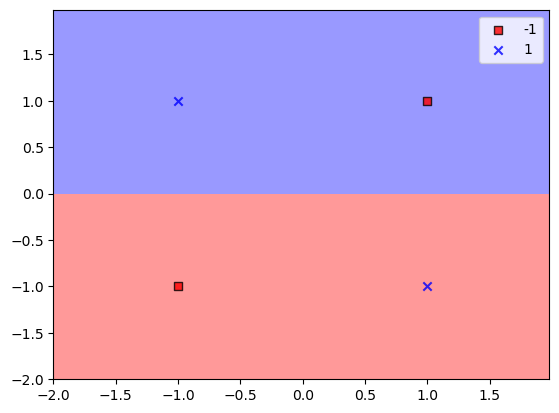

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


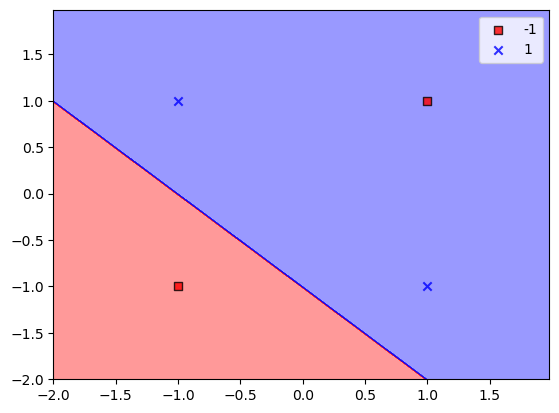

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 17


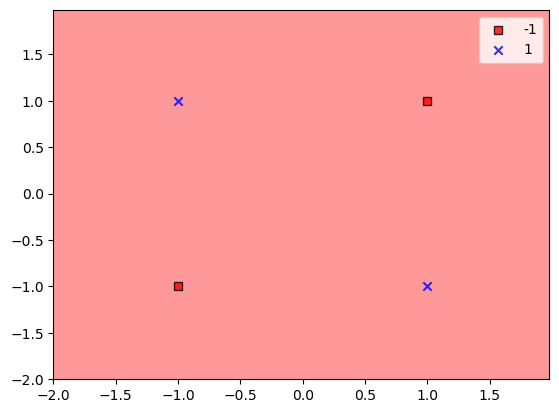

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


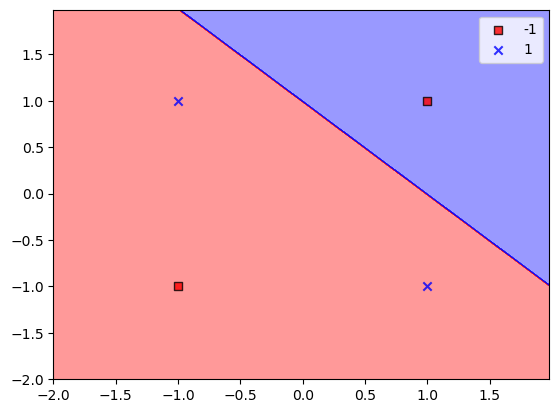

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


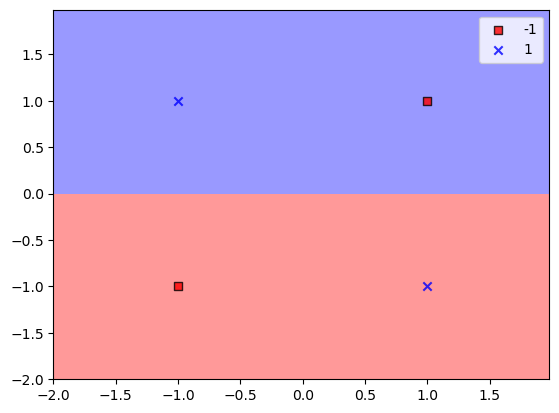

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


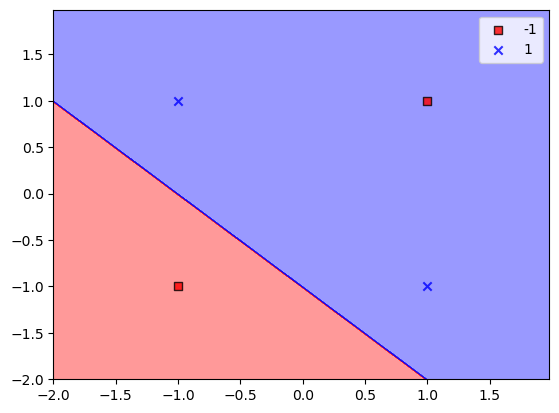

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 18


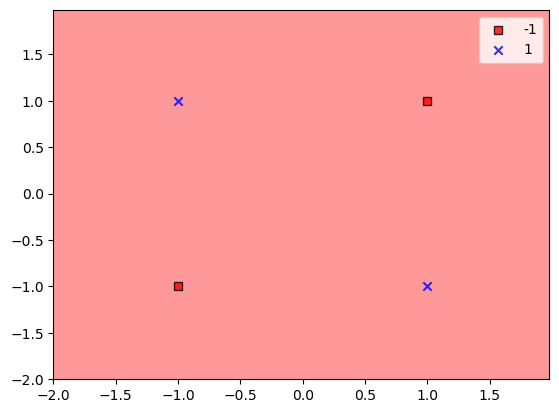

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


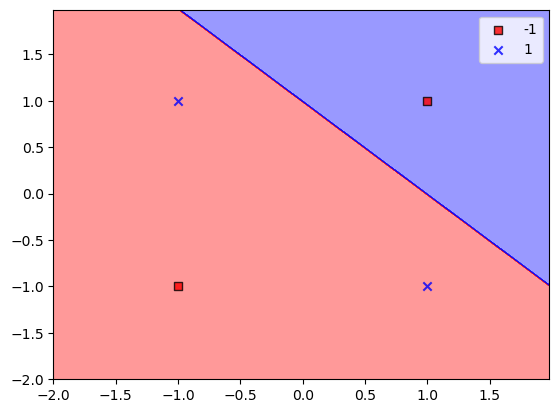

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


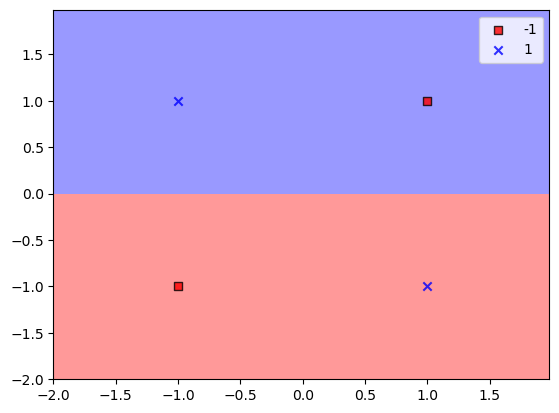

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


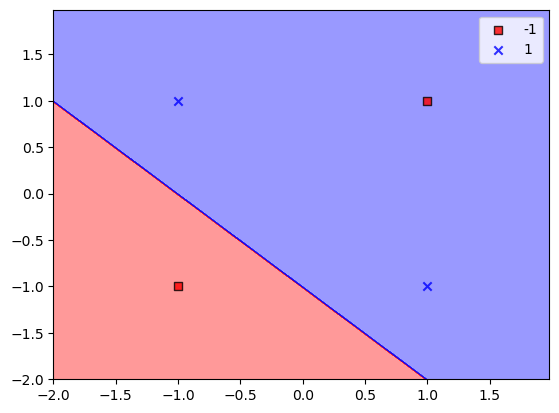

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 19


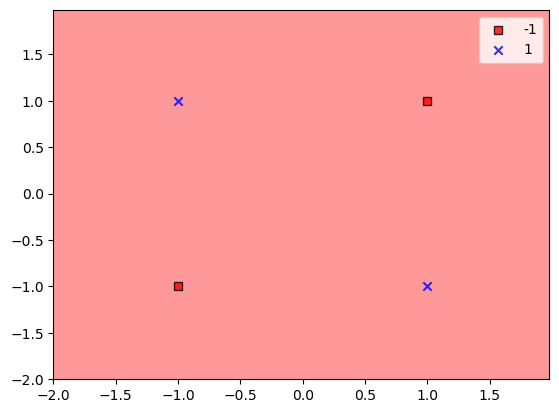

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


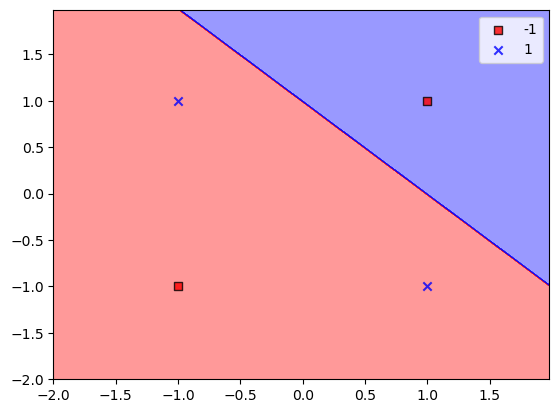

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


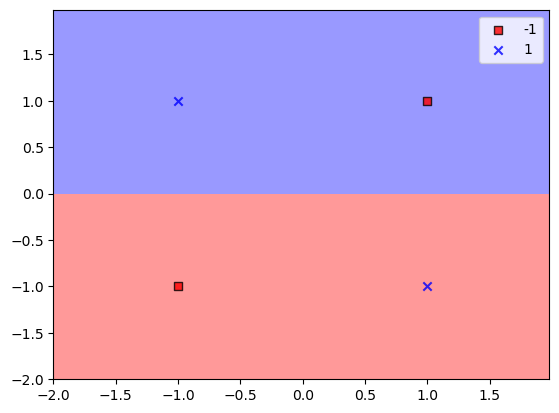

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


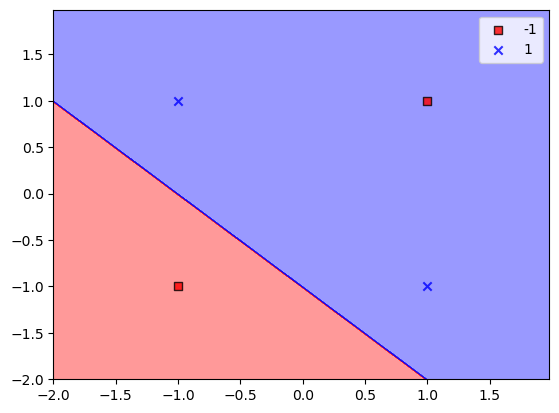

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 20


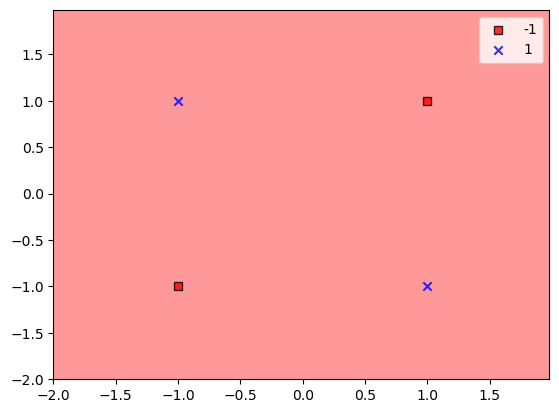

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


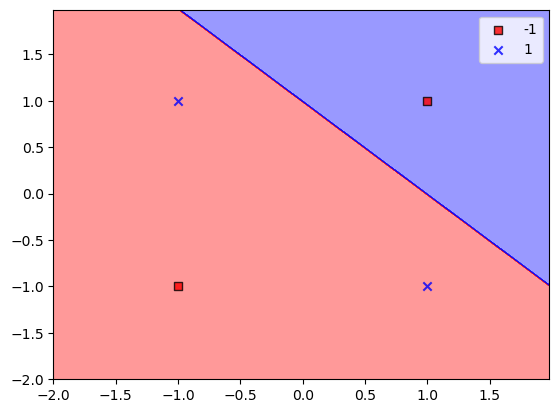

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


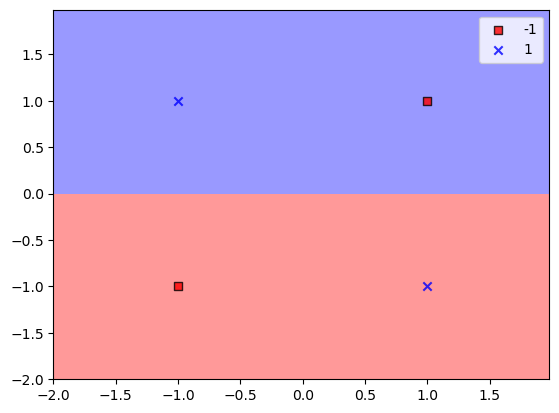

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


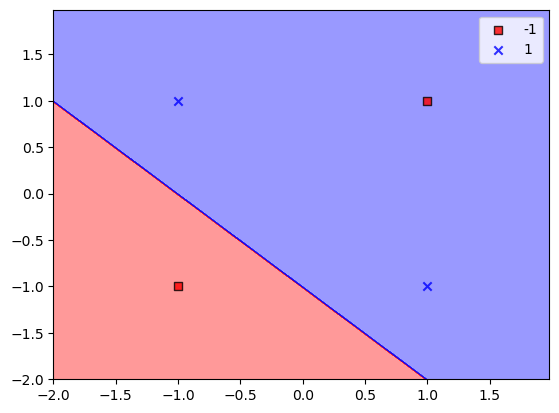

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 21


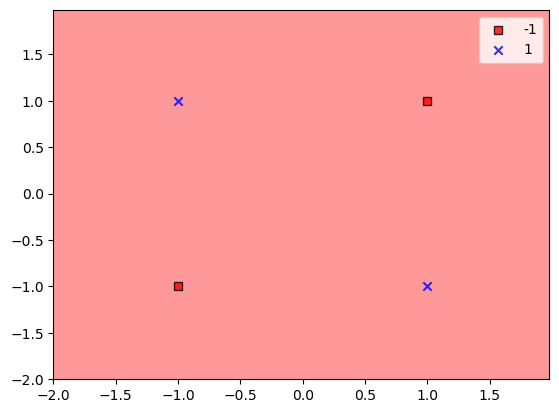

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


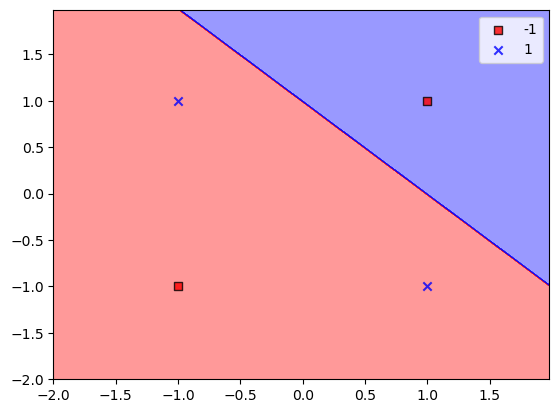

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


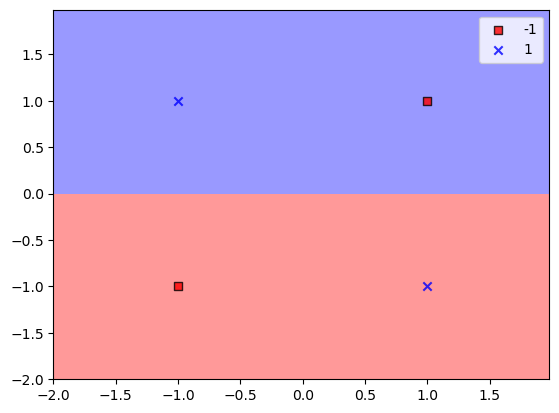

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


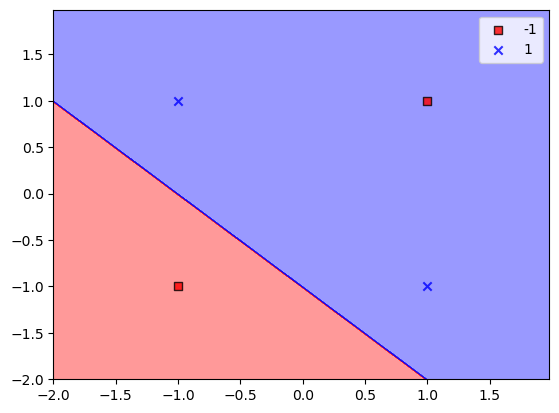

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 22


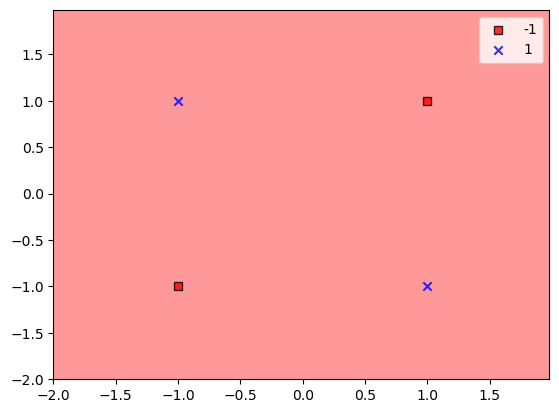

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


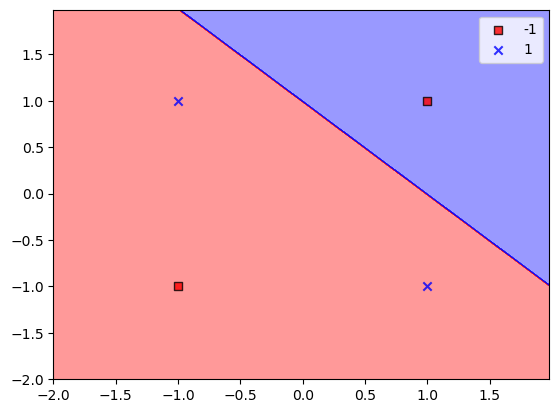

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


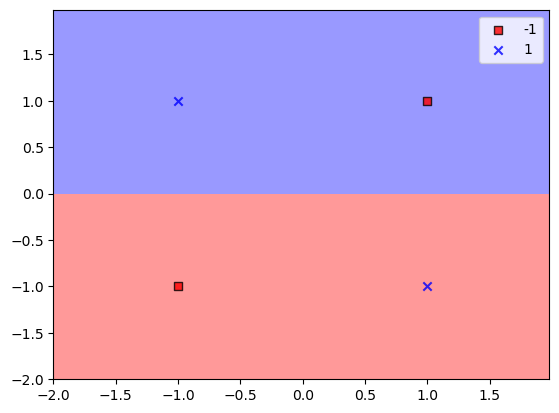

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


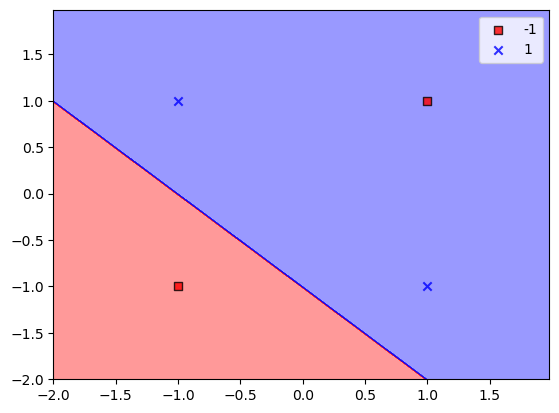

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 23


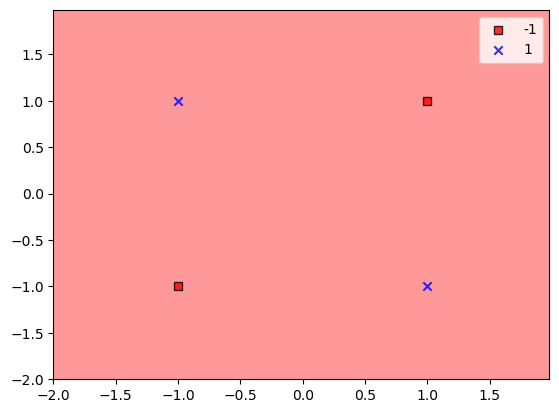

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


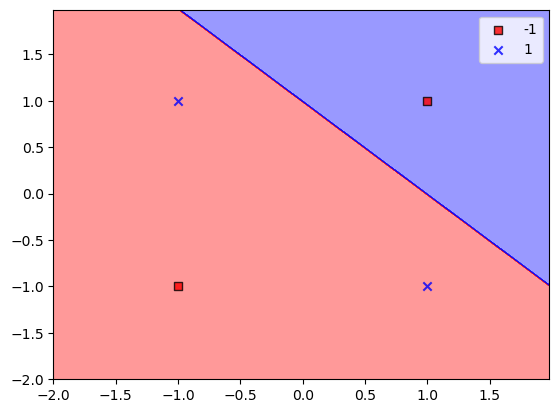

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


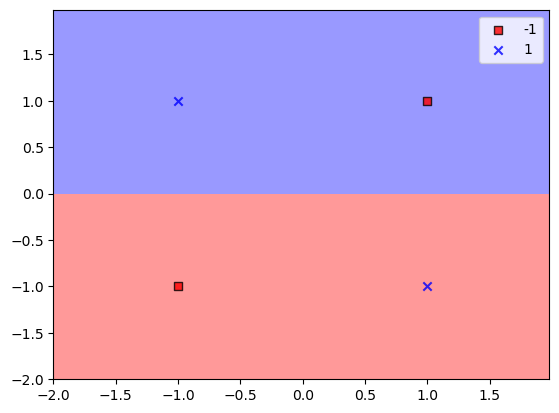

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


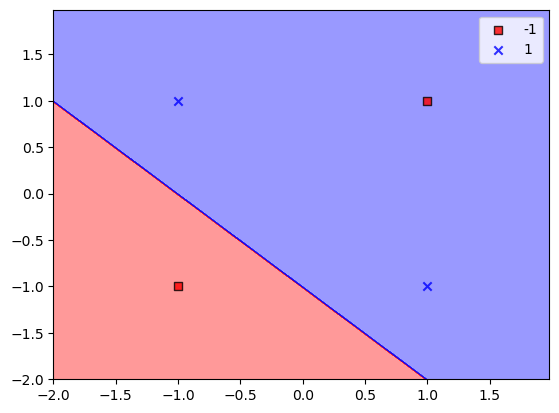

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 24


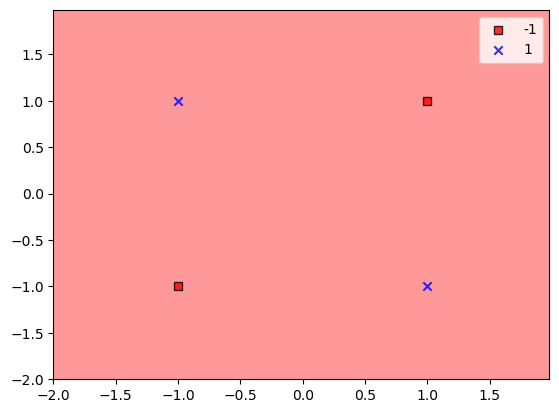

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


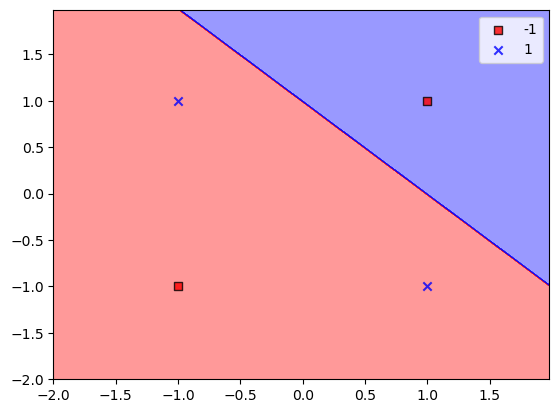

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


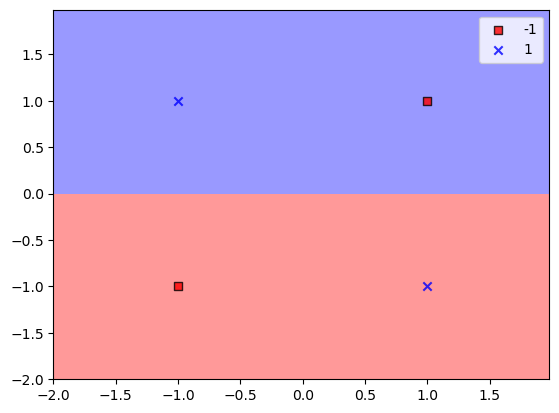

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


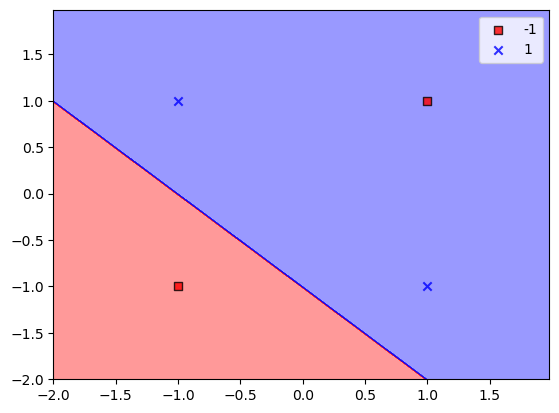

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 25


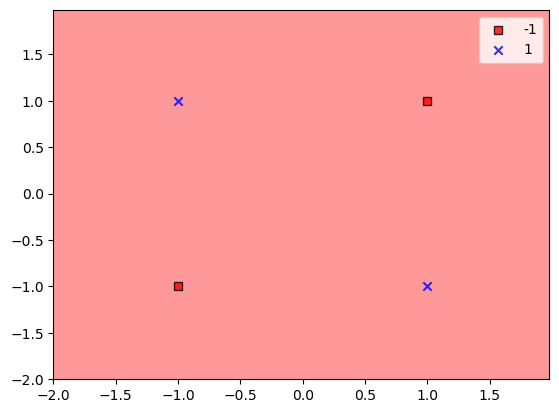

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


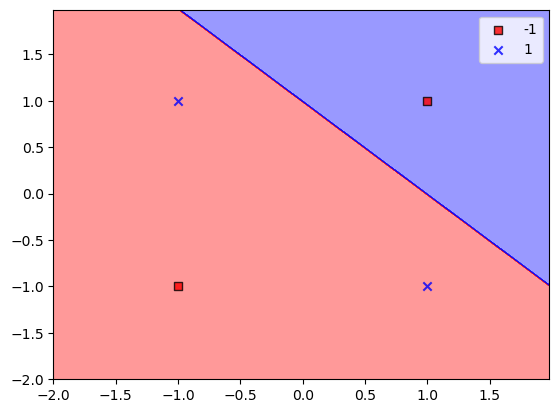

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


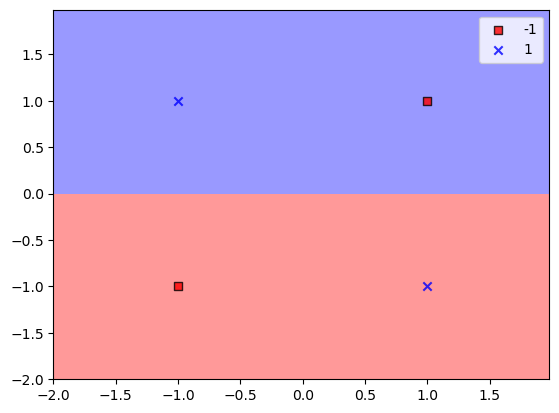

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


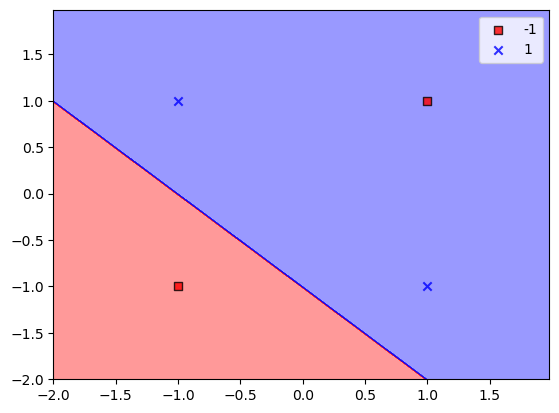

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 26


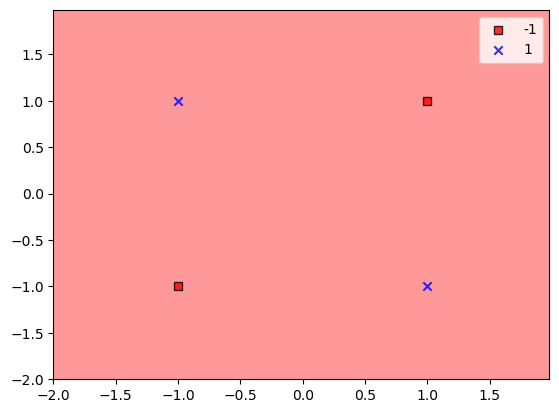

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


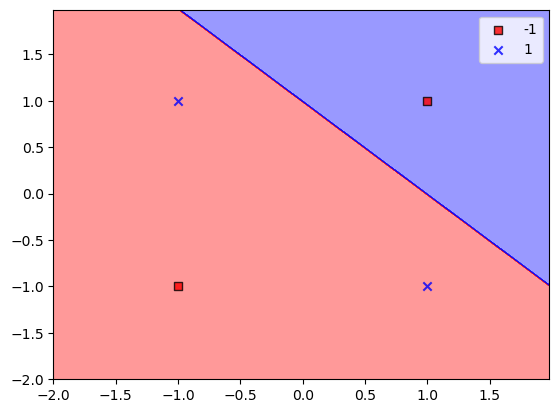

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


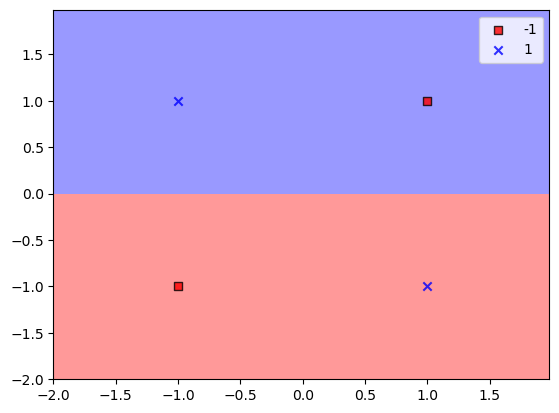

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


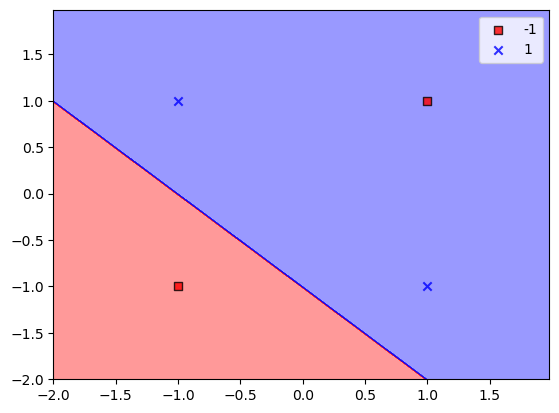

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 27


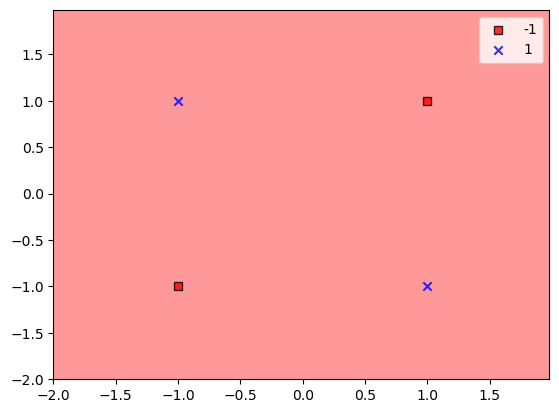

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


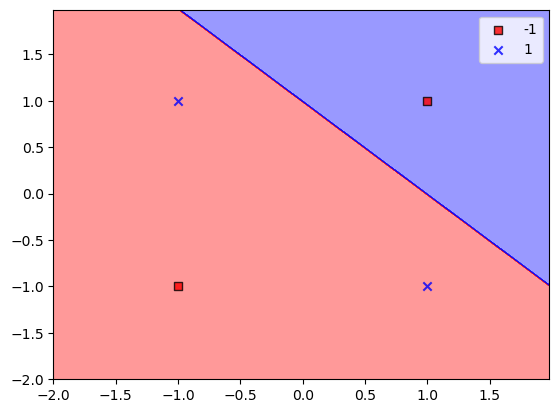

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


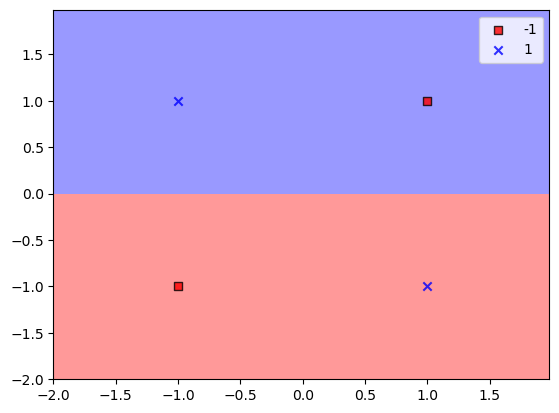

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


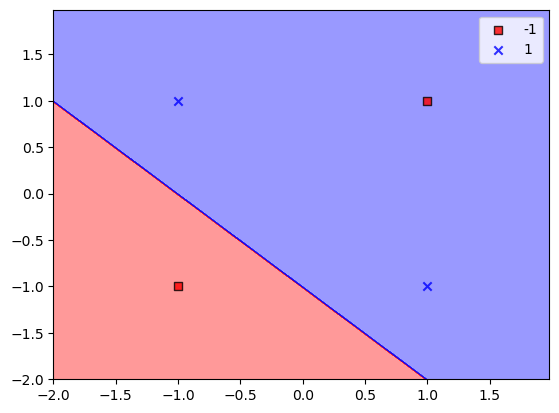

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 28


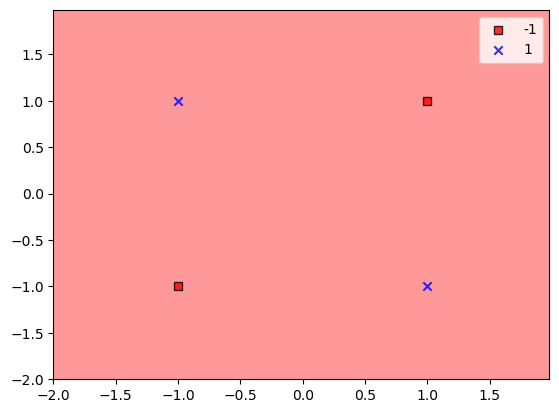

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


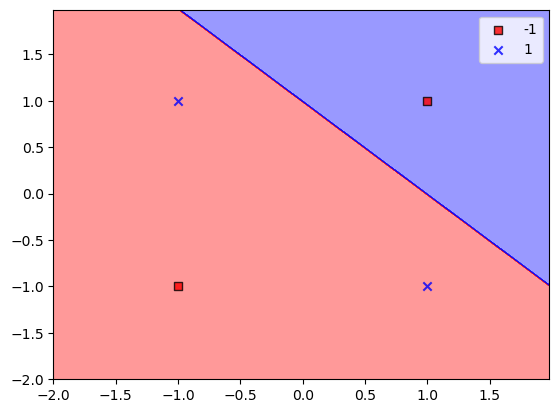

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


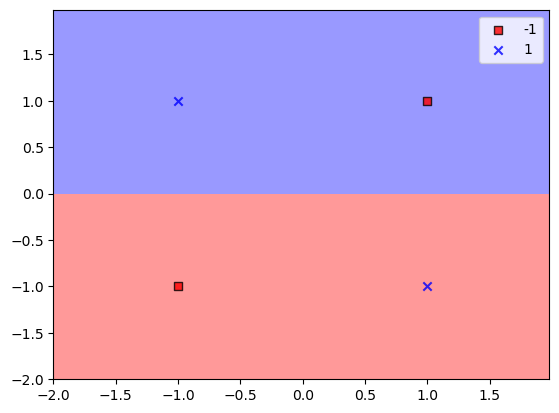

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


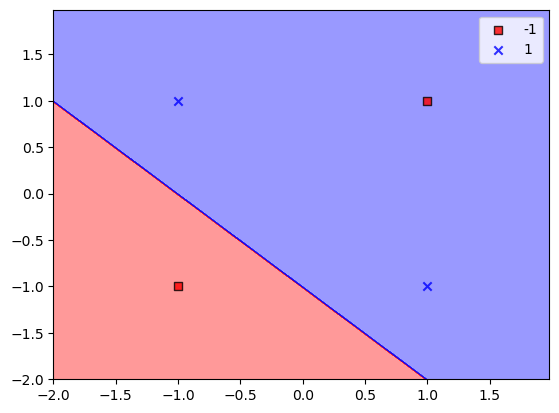

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 29


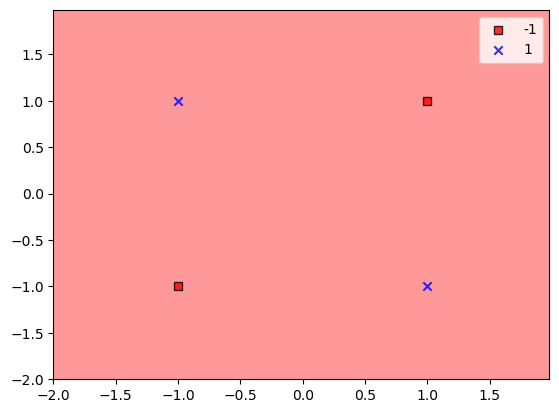

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


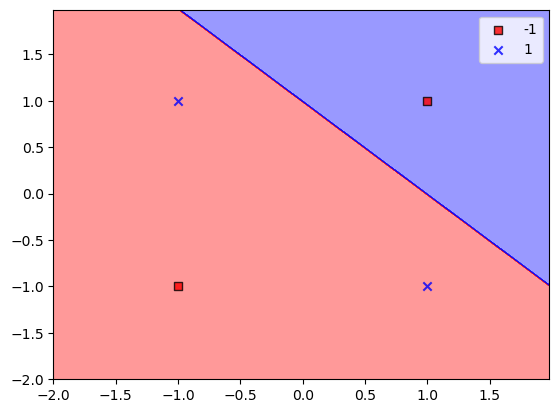

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


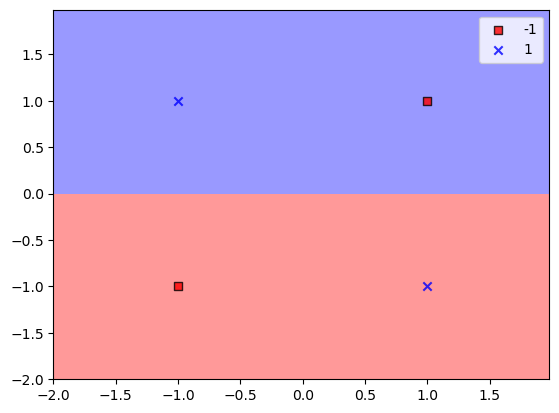

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


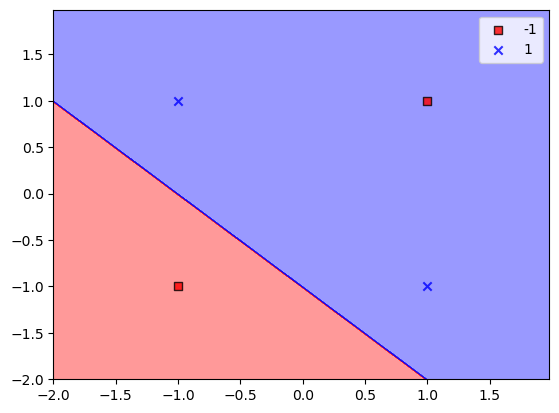

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 30


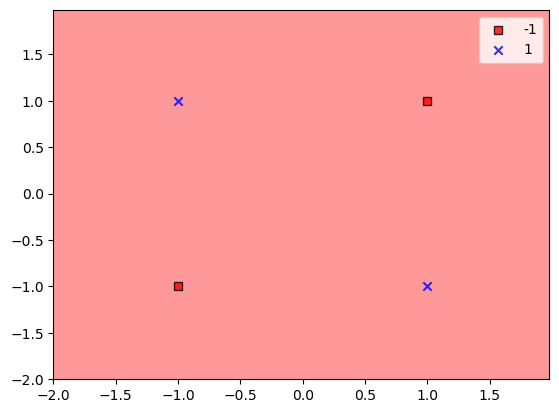

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


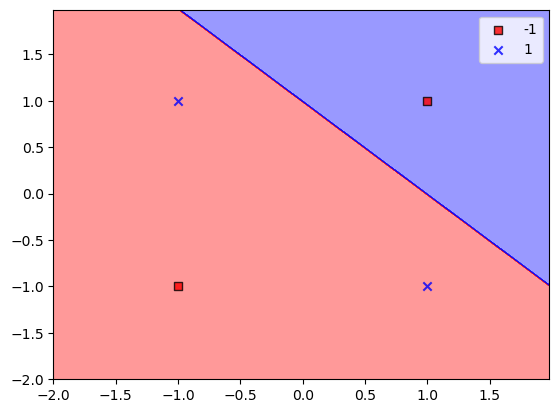

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


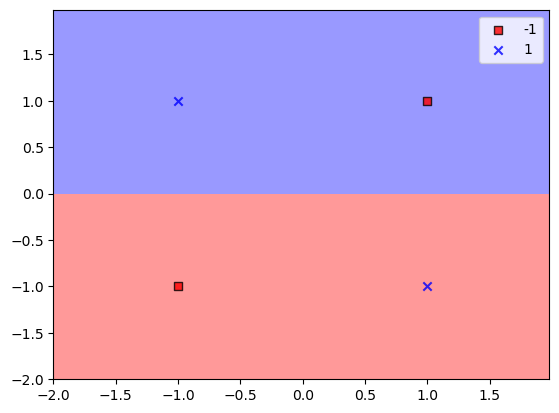

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


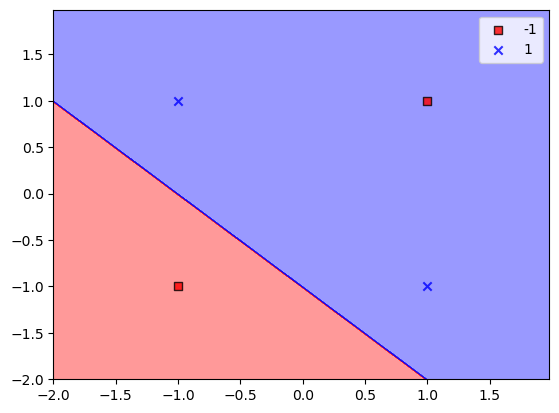

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 31


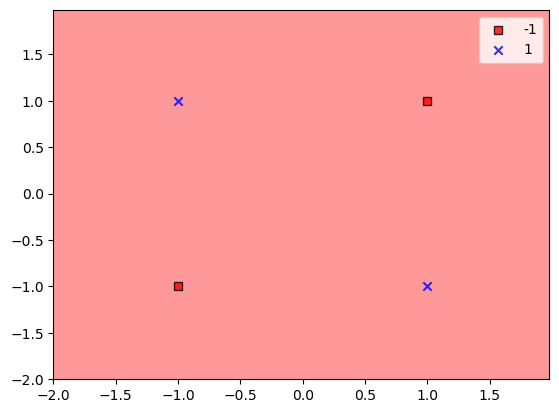

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


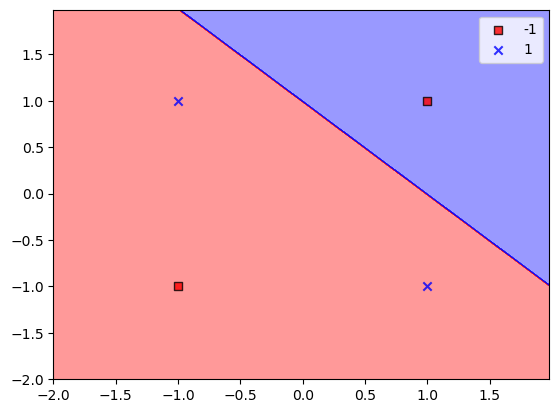

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


KeyboardInterrupt: 

In [96]:
#논리곱 구현
W = np.array([0,0])
b = 0 
adjusted = 0 
for i in range(100): 
    adjusted += train_plot(-1,-1,-1) 
    adjusted += train_plot(-1, 1,-1)
    adjusted += train_plot( 1,-1,-1)
    adjusted += train_plot( 1, 1, 1)
    print("iteration -----------------", i) 
    if not adjusted : break 
    adjusted = 0 

C:\Users\carlo\AppData\Local\Temp\ipykernel_30996\3054931198.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\carlo\AppData\Local\Temp\ipykernel_30996\3054931198.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


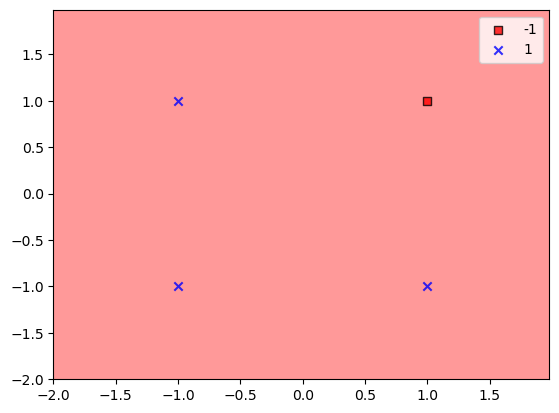

가중치 수정전 target : 1 y:0 ,b0, w:[0 0]
가중치 수정후 target : 1 y:0 ,b0.01, w:[-0.01 -0.01]


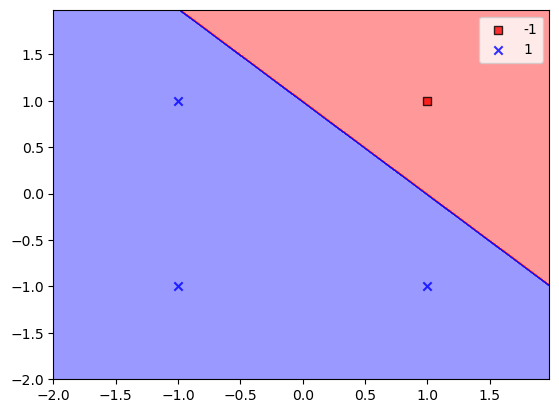

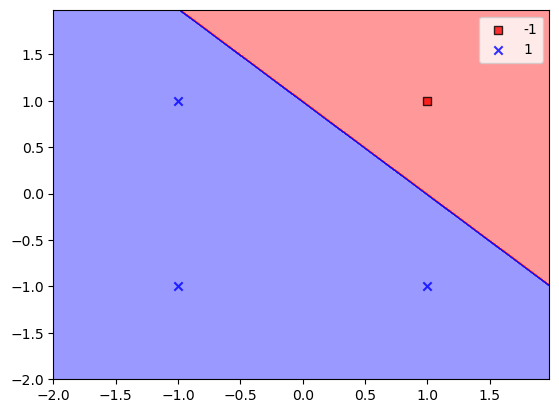

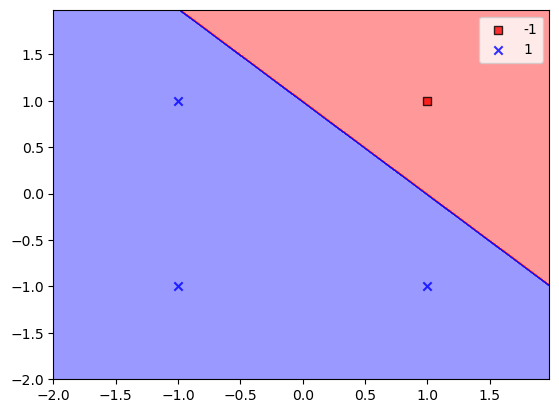

iteration ----------------- 0


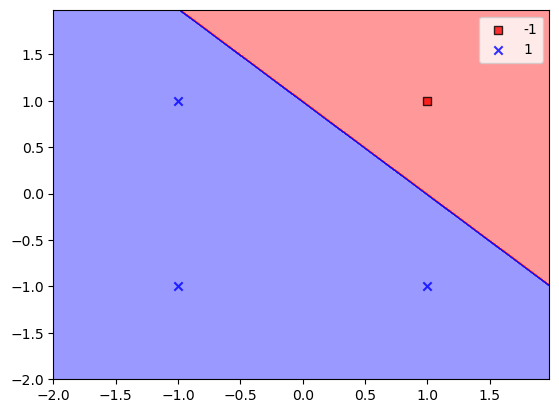

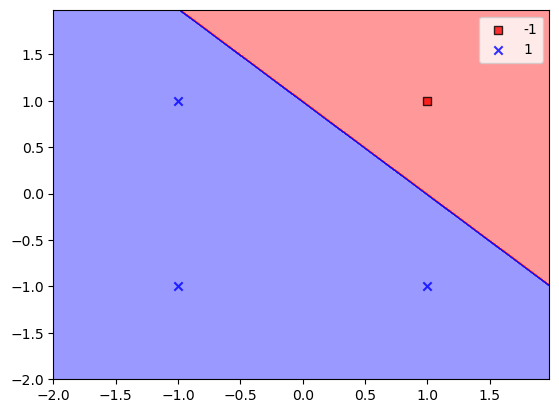

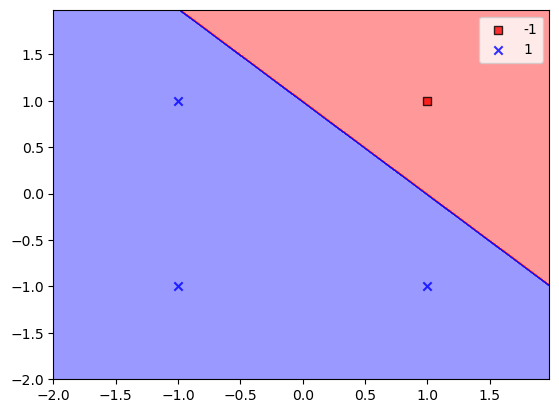

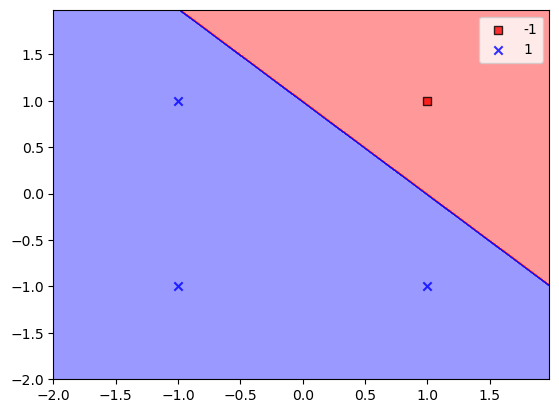

iteration ----------------- 1


In [14]:
#NAND
W = np.array([0,0])
b = 0 
X_plot = np.array([[-1,-1],[-1, 1],[1,-1],[1, 1]])
y_plot = np.array([1, 1, 1, -1])
adjusted = 0 
for i in range(100): 
    adjusted += train_plot(-1,-1,1 , X_plot = X_plot , y_plot = y_plot) 
    adjusted += train_plot(-1, 1, 1 , X_plot = X_plot , y_plot = y_plot)
    adjusted += train_plot( 1,-1, 1 , X_plot = X_plot , y_plot = y_plot)
    adjusted += train_plot( 1, 1,-1 , X_plot = X_plot , y_plot = y_plot)
    print("iteration -----------------", i) 
    if not adjusted : break 
    adjusted = 0 

C:\Users\carlo\AppData\Local\Temp\ipykernel_30996\3054931198.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\carlo\AppData\Local\Temp\ipykernel_30996\3054931198.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


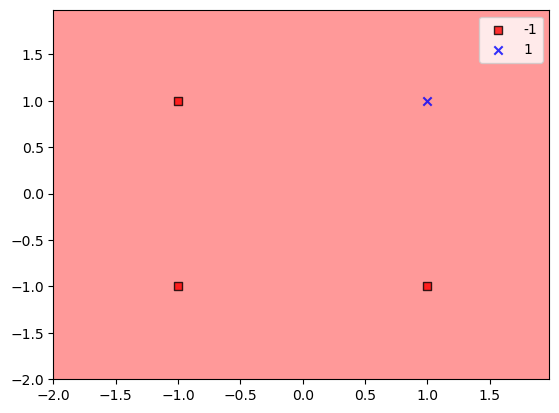

가중치 수정전 target : -1 y:0 ,b0, w:[0 0]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


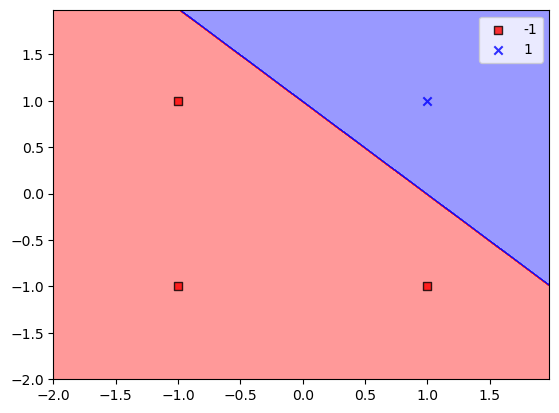

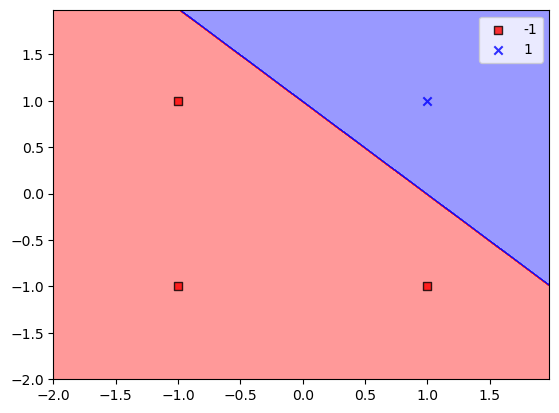

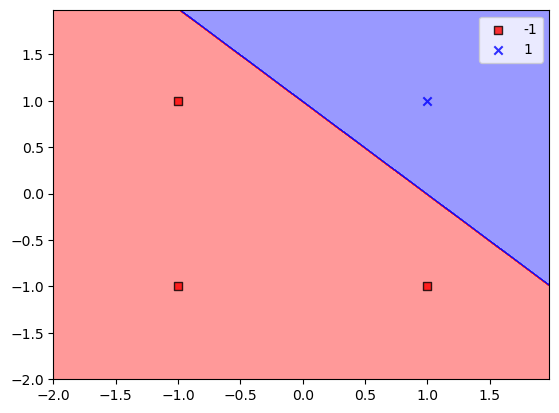

iteration ----------------- 0


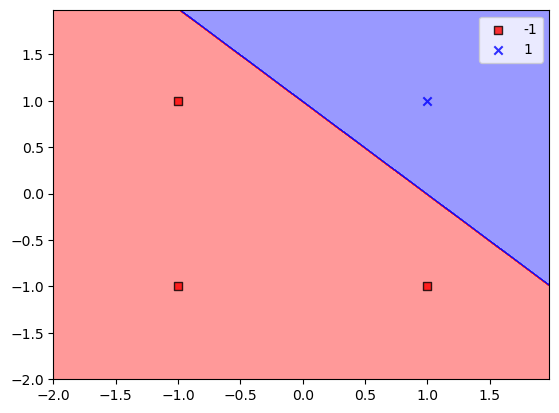

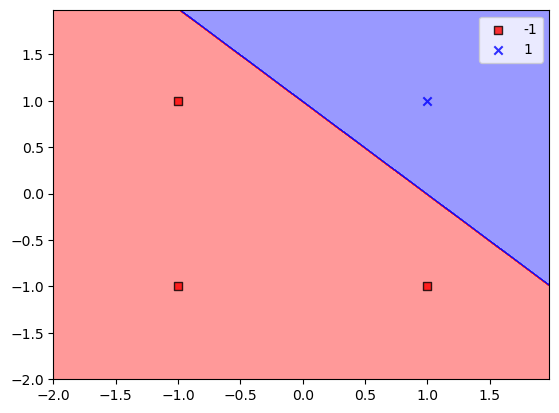

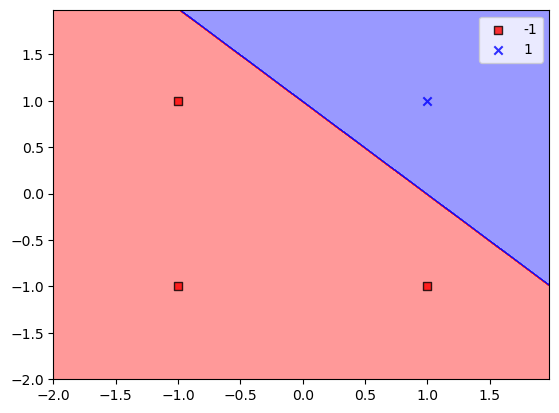

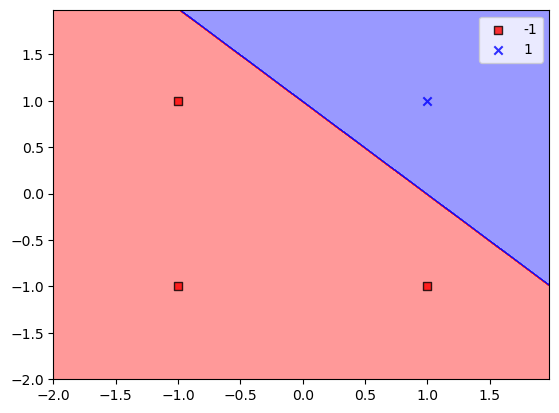

iteration ----------------- 1


In [13]:
#AND
W = np.array([0,0])
b = 0 
X_plot = np.array([[-1,-1],[-1, 1],[1,-1],[1, 1]])
y_plot = np.array([-1, -1, -1, 1])
adjusted = 0 
for i in range(100): 
    adjusted += train_plot(-1,-1,-1 , X_plot = X_plot , y_plot = y_plot) 
    adjusted += train_plot(-1, 1,-1 , X_plot = X_plot , y_plot = y_plot)
    adjusted += train_plot( 1,-1,-1 , X_plot = X_plot , y_plot = y_plot)
    adjusted += train_plot( 1, 1,1 , X_plot = X_plot , y_plot = y_plot)
    print("iteration -----------------", i) 
    if not adjusted : break 
    adjusted = 0 

C:\Users\carlo\AppData\Local\Temp\ipykernel_30996\3054931198.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\carlo\AppData\Local\Temp\ipykernel_30996\3054931198.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


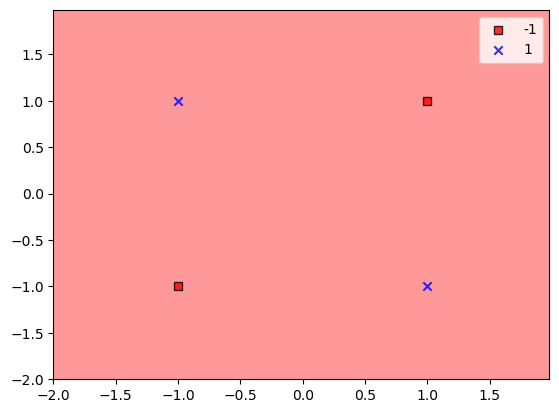

가중치 수정전 target : -1 y:0 ,b0, w:[0 0]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


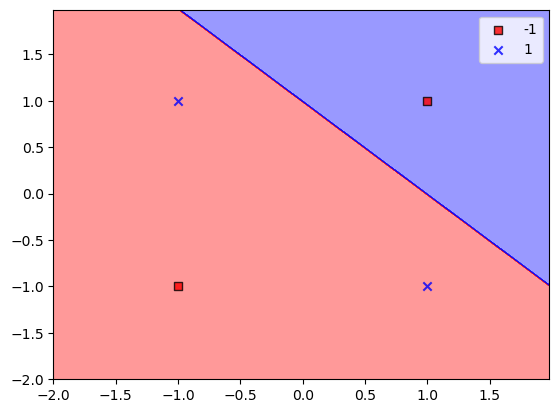

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


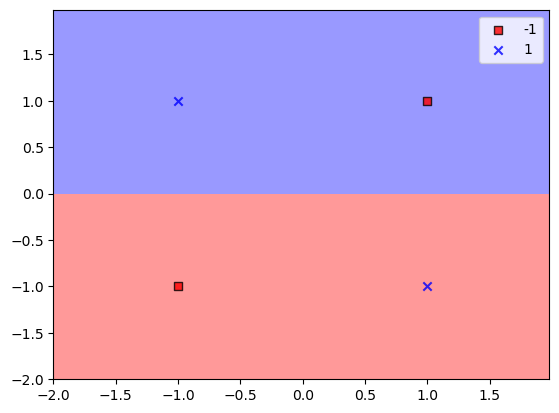

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


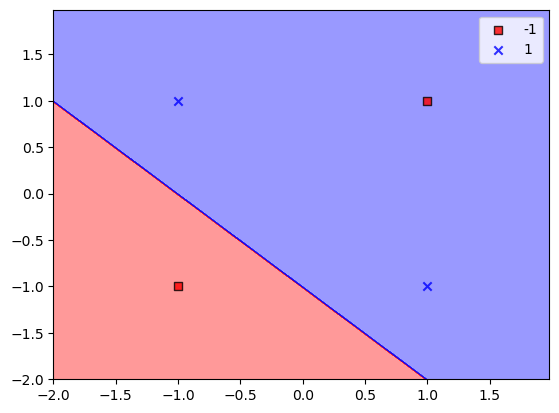

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 0


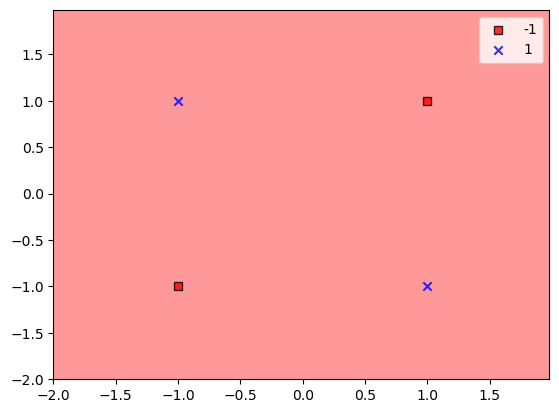

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


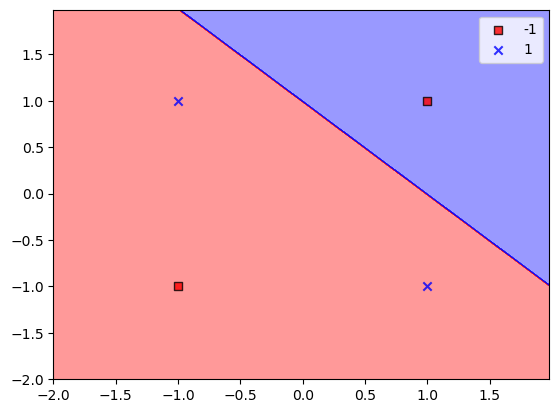

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


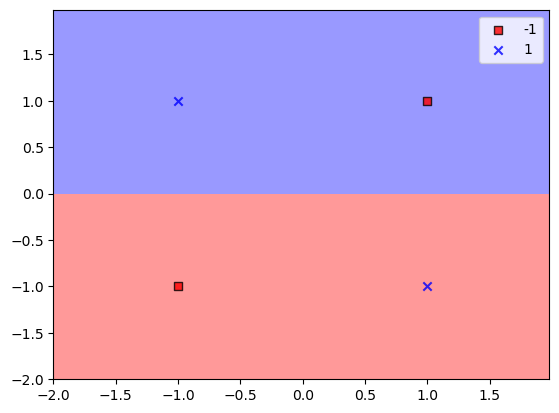

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


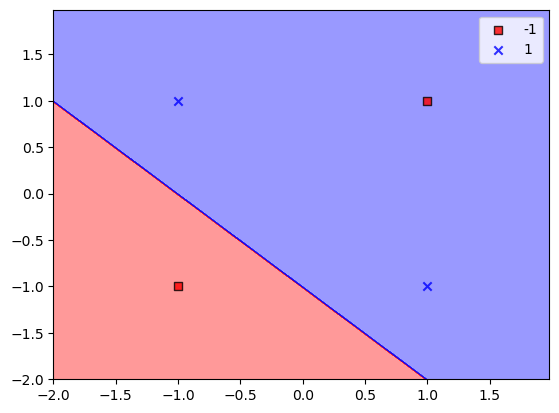

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 1


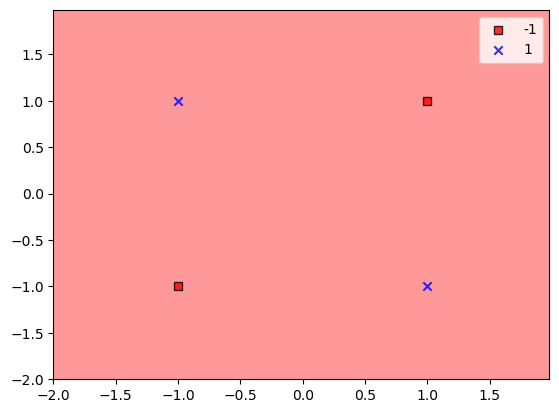

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


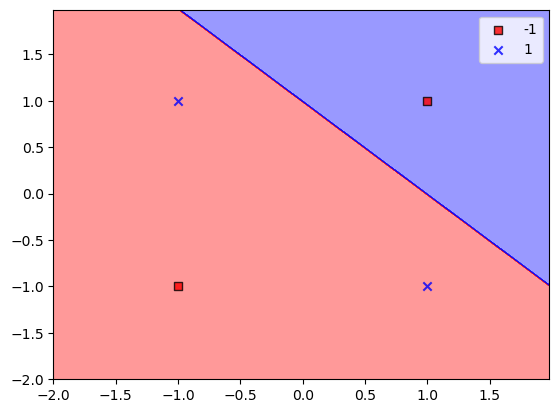

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


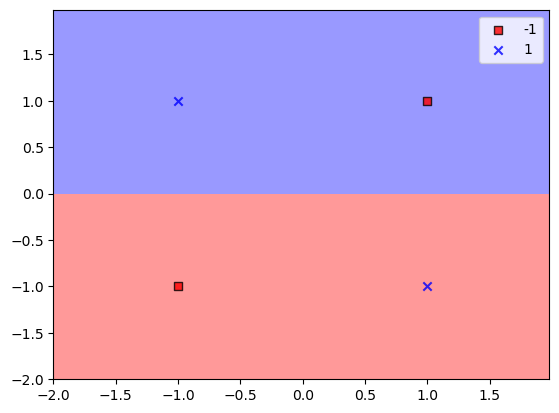

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


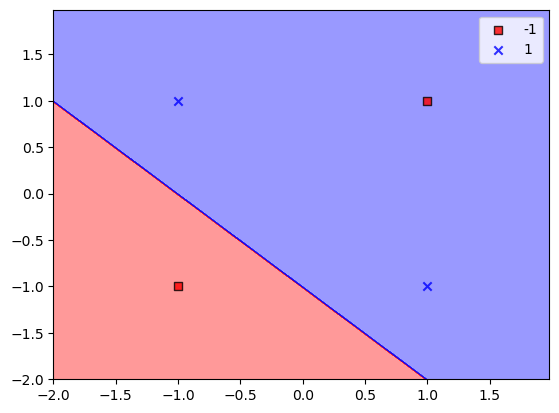

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 2


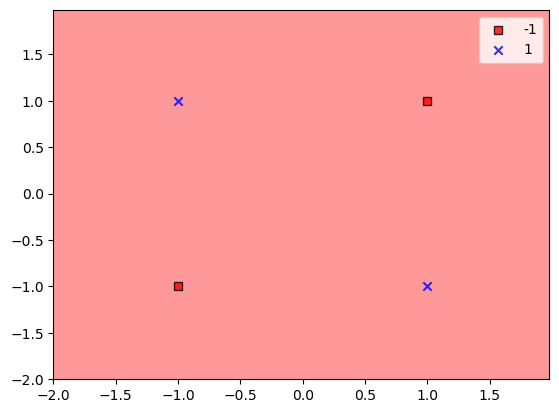

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


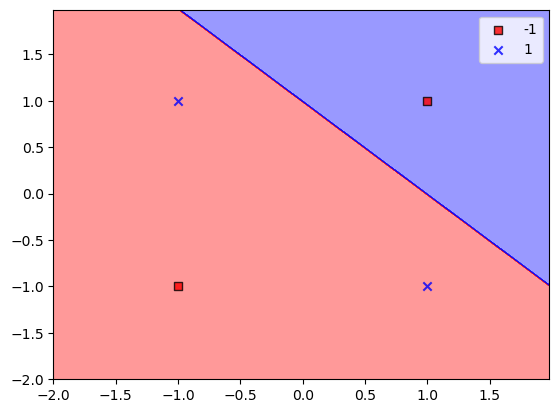

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


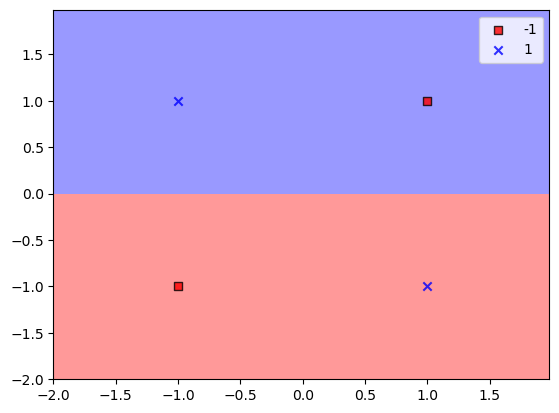

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


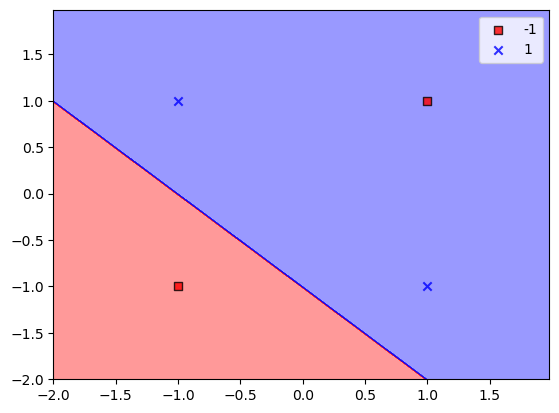

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 3


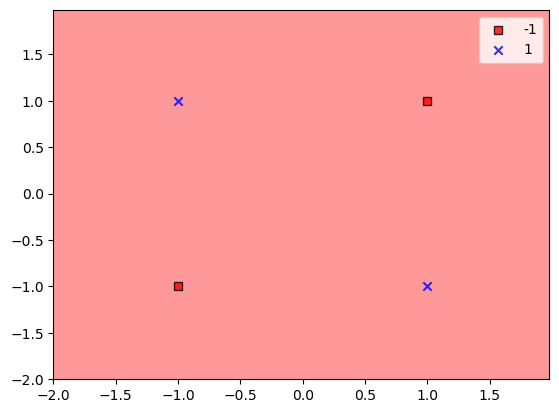

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


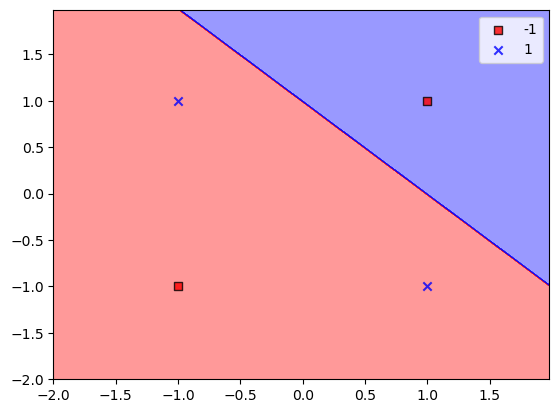

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


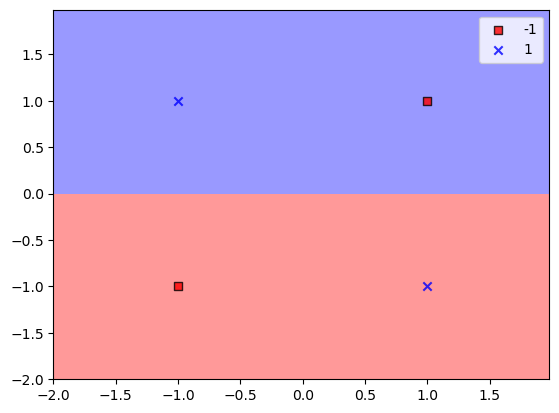

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


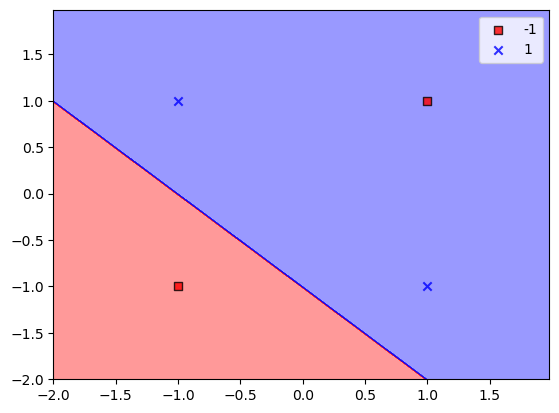

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 4


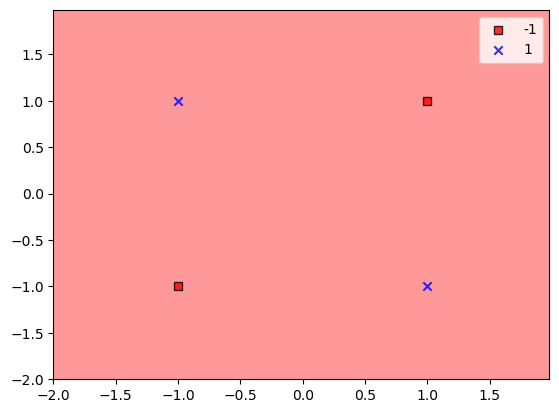

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


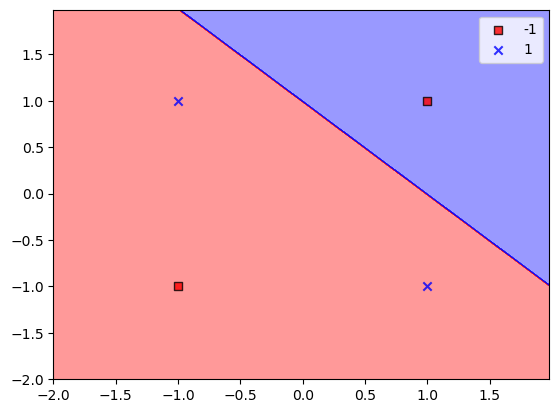

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


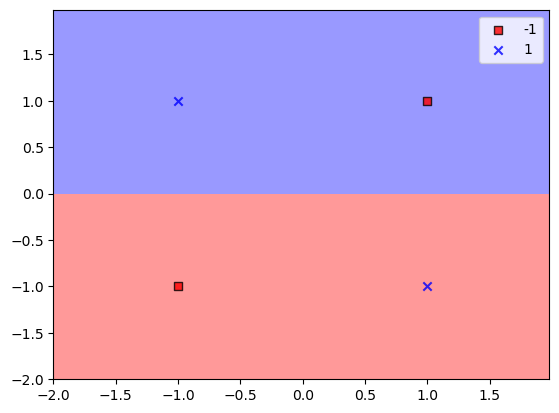

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


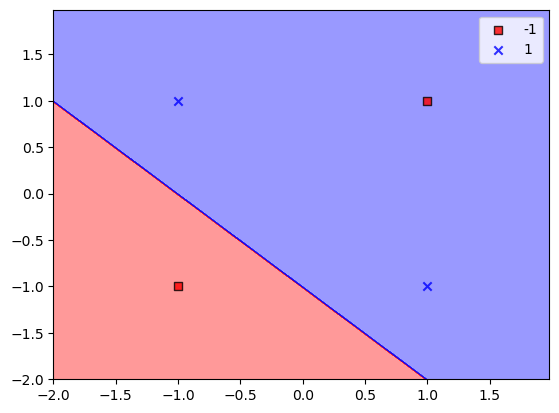

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 5


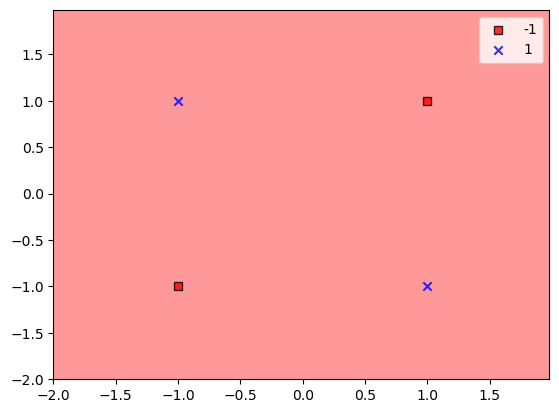

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


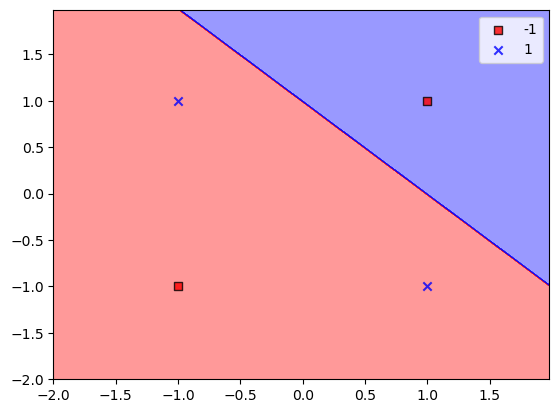

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


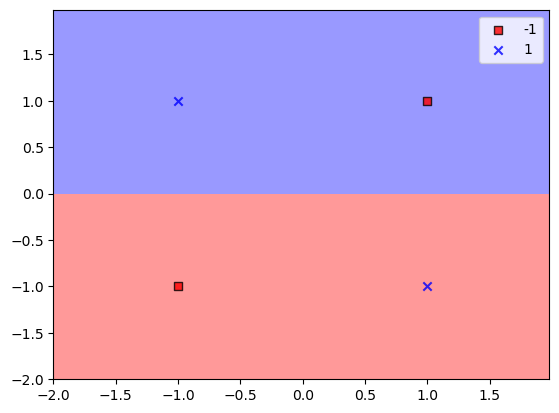

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


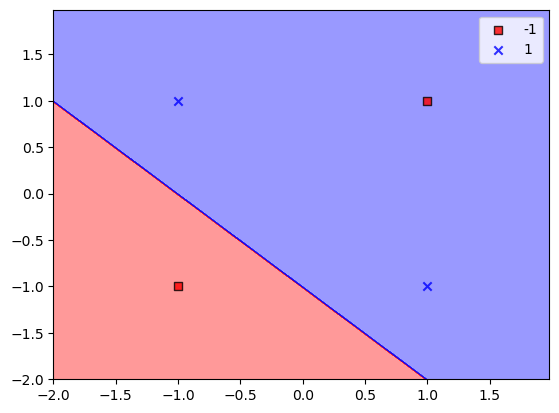

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 6


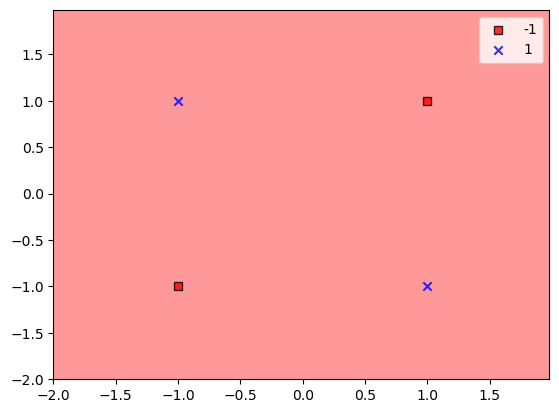

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


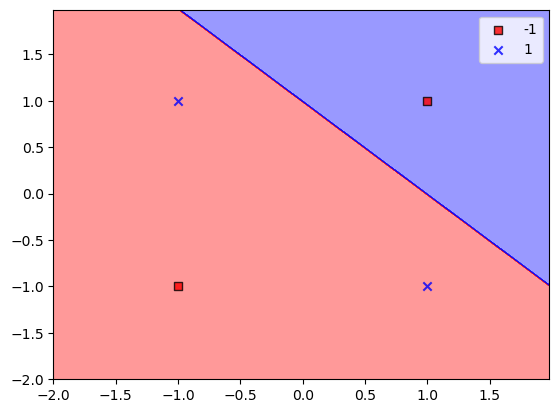

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


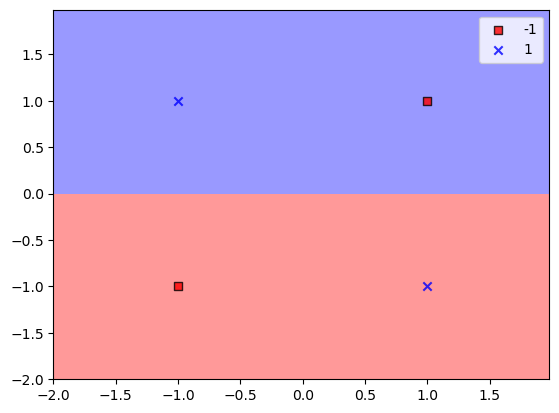

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


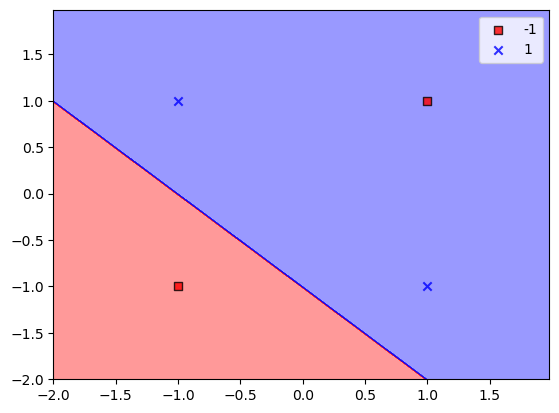

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 7


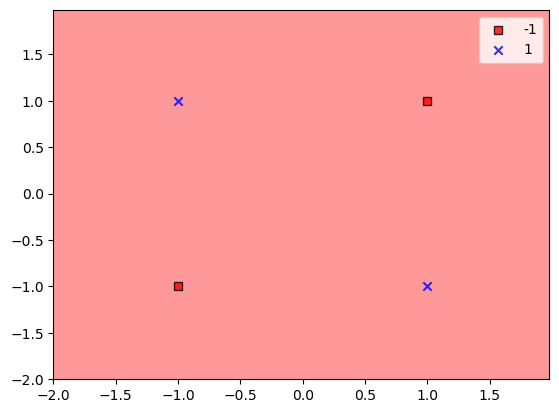

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


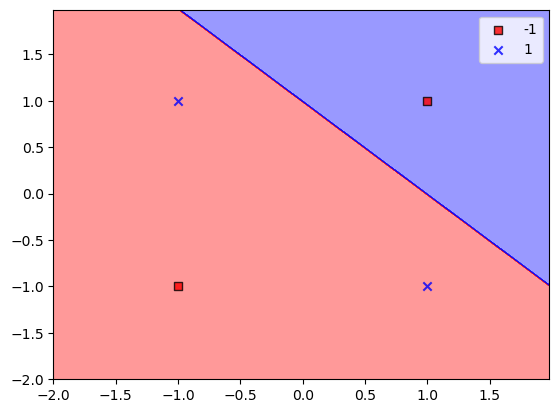

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


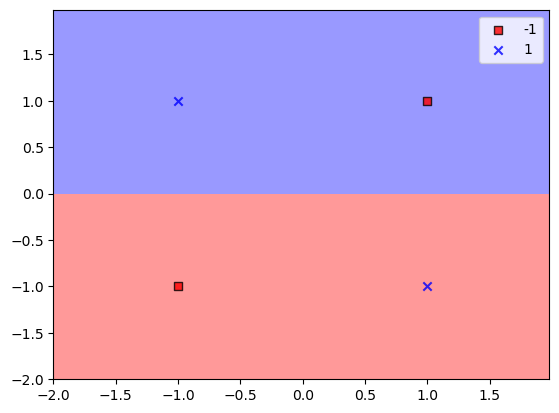

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


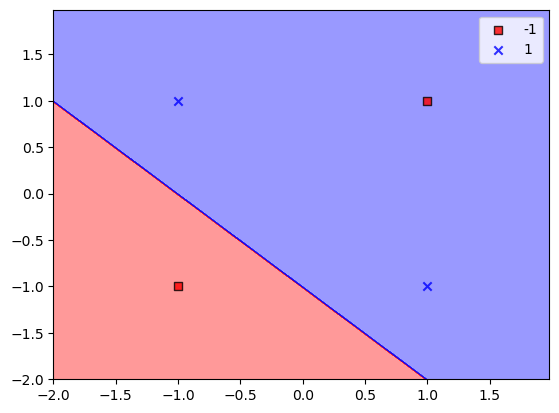

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 8


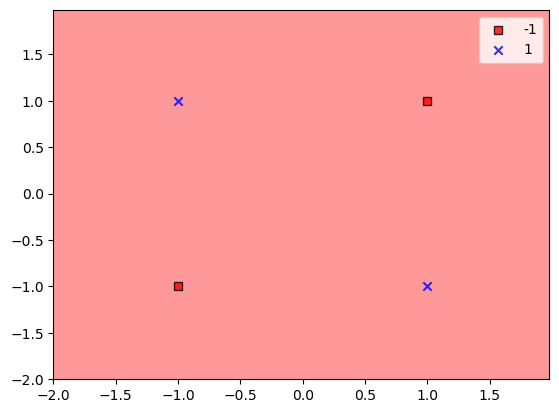

가중치 수정전 target : -1 y:0 ,b0.0, w:[0. 0.]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[0.01 0.01]


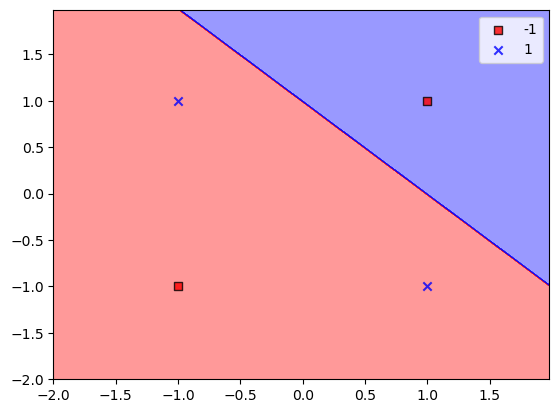

가중치 수정전 target : 1 y:-1 ,b-0.01, w:[0.01 0.01]
가중치 수정후 target : 1 y:-1 ,b0.0, w:[0.   0.02]


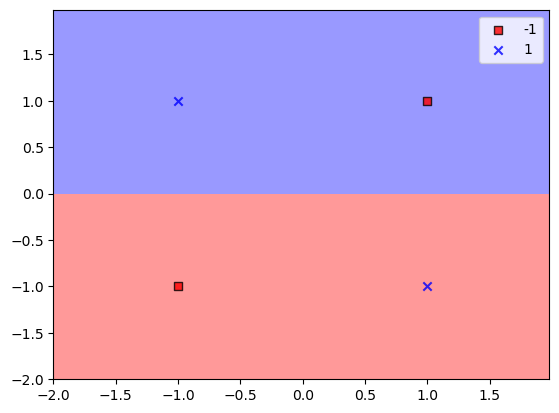

가중치 수정전 target : 1 y:-1 ,b0.0, w:[0.   0.02]
가중치 수정후 target : 1 y:-1 ,b0.01, w:[0.01 0.01]


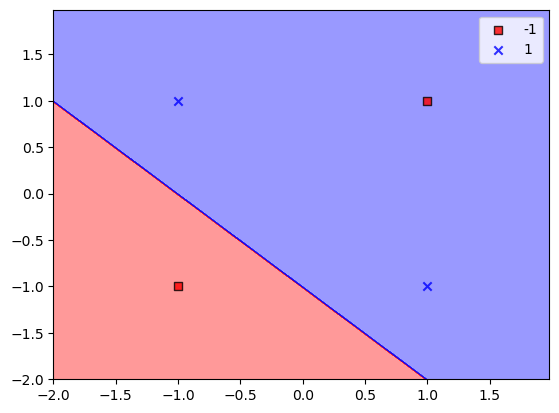

가중치 수정전 target : -1 y:1 ,b0.01, w:[0.01 0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[0. 0.]
iteration ----------------- 9


In [15]:
#XOR
W = np.array([0,0])
b = 0 
X_plot = np.array([[-1,-1],[-1, 1],[1,-1],[1, 1]])
y_plot = np.array([-1, 1, 1, -1])
adjusted = 0 
for i in range(10): 
    adjusted += train_plot(-1,-1,-1 , X_plot = X_plot , y_plot = y_plot) 
    adjusted += train_plot(-1, 1, 1 , X_plot = X_plot , y_plot = y_plot)
    adjusted += train_plot( 1,-1, 1 , X_plot = X_plot , y_plot = y_plot)
    adjusted += train_plot( 1, 1,-1 , X_plot = X_plot , y_plot = y_plot)
    print("iteration -----------------", i) 
    if not adjusted : break 
    adjusted = 0 